In [490]:
import numpy as np
import pandas as pd
from collections import UserDict, defaultdict
import json
import pickle
import ast

In [ ]:
import rdkit
from rdkit import DataStructs, Chem
from rdkit.Chem import MACCSkeys, Draw
import torch
import pandas as pd
inp = pd.read_csv('data/smiles/cyp1a2_veith/cyp1a2_veith_gen_pos_stgg.txt', names=['SMILES'])
inp2 = pd.read_csv('data/smiles/cyp1a2_veith/cyp1a2_veith_gen_neg_stgg.txt', names=['SMILES'])
img2 = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in list(inp['SMILES']  )[:10] +list(inp2['SMILES']  ) [20:30] ], molsPerRow=5,subImgSize=(500,500), legends=list(inp['SMILES']  )[:10]+list(inp2['SMILES'])[20:30])
img2

In [ ]:
inp = pd.read_csv('data/smiles/cyp1a2_veith/cyp1a2_veith_gen_pos_GDSS.txt', names=['SMILES'])
inp2 = pd.read_csv('data/smiles/cyp1a2_veith/cyp1a2_veith_gen_neg_GDSS.txt', names=['SMILES'])
img2 = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in list(inp['SMILES']  )[:10] +list(inp2['SMILES']  ) [:10] ], molsPerRow=5,subImgSize=(500,500), legends=list(inp['SMILES']  )[:10]+list(inp2['SMILES'])[:10])
img2

In [2]:
dict= {'activations_time': 0.45316004753112793,
 'fid': 3.3299173196610354e-08,
 'fid_time': 0.4601743221282959,
 'kid': -0.27056575,
 'kid_time': 7.3782408237457275,
 'precision': 1.0,
 'recall': 1.0,
 'f1_pr': 1.00001,
 'precision_time': 0.7771599292755127,
 'recall_time': 0.7771599292755127,
 'f1_pr_time': 0.7771599292755127,
 'density': 1.2053639846743296,
 'coverage': 1.0,
 'f1_dc': 1.0931303090896223,
 'density_time': 0.6621618270874023,
 'coverage_time': 0.6621618270874023,
 'f1_dc_time': 0.6621618270874023,
 'mmd_rbf': 0,
 'mmd_rbf_time': 1.262209177017212,
 'mmd_linear': 0.0,
 'mmd_linear_time': 0.45316004753112793,
 'nspdk_mmd': 0.08083532491372947,
 'nspdk_mmd_time': 14.770469427108765,
 'valid': 1.0,
 'unique@1000': 1.0,
 'unique@10000': 1.0,
 'FCD/Test': 0.06483010510226318,
 'SNN/Test': 1.0,
 'Frag/Test': 0.9985447050085542,

 'FCD/TestSF': 53.23109144992008,
 'SNN/TestSF': 0.09263560138642787,
 'Frag/TestSF': 0.0,

 'IntDiv': 0.27166667461395255,
 'IntDiv2': 0.2488384959538309,
 'Filters': 1.0,
 'logP': 1.0247960207991231,
 'SA': 0.08714412133552243,
 'QED': 0.0421093380466714,
 'weight': 61.472655391351964,
 'Novelty': 1.0,
 'AUC_ROC_based_metric_with_nspdk': 0.0,
 'AUC_ROC_based_metric_with_nspdk_time': 122.63310122489929,
 'AUC_ROC_based_metric_with_nn_classifier': 0,
 'AUC_ROC_based_metric_with_nn_classifier_time': 167.09346532821655,
 'dataset': 'bbb_martins'}

In [3]:
import json
with open('smiles_datasets_experiments.txt', 'a+') as f:
     f.write(json.dumps(dict) +'\n')
     

In [717]:
def send_to_dataframe(l):
    r=pd.DataFrame.from_dict(l[0],orient='index')
    #print(r)
    for i  in l[1:]:
        #print(e)
        e=pd.DataFrame.from_dict(i,orient='index')
        r=pd.concat([r, e], axis=1)
        #print(r)
    df=r.T.reset_index().drop(columns=['index'])
    cols = list(df.columns)
    cols = [cols[-1]] + cols[:-1]
    df = df[cols]
    return df

list_of_dictionaries=[]
for line in  open("smiles_datasets_experiments.txt", "r"):
    line=line.rstrip('\n')
    print(line)
    dictionary = ast.literal_eval(line)
    list_of_dictionaries.append(dictionary)


df=send_to_dataframe(list_of_dictionaries) 
df

{'activations_time': 0.6972849369049072, 'fid': 1.3730700501235589, 'fid_time': 0.701735258102417, 'kid': 
0.020275593, 'kid_time': 0.746666669845581, 'precision': 0.9917517674783974, 'recall': 0.9387514723203769, 'f1_pr':
0.9645340888267413, 'precision_time': 1.2265045642852783, 'recall_time': 1.2265045642852783, 'f1_pr_time': 
1.2265045642852783, 'density': 1.17643362136685, 'coverage': 0.9791912053396152, 'f1_dc': 1.0687985309867434, 
'density_time': 1.0270962715148926, 'coverage_time': 1.0270962715148926, 'f1_dc_time': 1.0270962715148926, 
'mmd_rbf': 0.0011846423149108887, 'mmd_rbf_time': 1.6261205673217773, 'mmd_linear': 0.14991595, 'mmd_linear_time': 
0.6975932121276855, 'nspdk_mmd': 0.0005622522901392868, 'nspdk_mmd_time': 36.72433519363403, 'wl_mmd': 
0.0003269389487676744, 'wl_mmd_time': 5.553701639175415, 'valid': 1.0, 'unique@1000': 0.584, 'unique@10000': 
0.37038491751767477, 'FCD/Test': 0.0013606157713800526, 'SNN/Test': 0.9996399581198232, 'Frag/Test': 
0.9999461721587711, 'FCD/TestSF': 52.96185071857515, 'SNN/TestSF': 0.08154201792891065, 'Frag/TestSF': 0.0, 
'IntDiv': 0.3800599523174186, 'IntDiv2': 0.34724568561881564, 'Filters': 0.9603299293008641, 'logP': 
0.1824547979061978, 'SA': 0.015304399874087713, 'QED': 0.0033933081396117287, 'weight': 8.570958668932956, 
'Novelty': 1.0, 'AUC_ROC_based_metric_with_nspdk': 0.0, 'AUC_ROC_based_metric_with_nspdk_time': 283.3891921043396, 
'AUC_ROC_based_metric_with_nn_classifier': 1.0, 'AUC_ROC_based_metric_with_nn_classifier_time': 333.99452018737793,
'dataset': 'ames', 'generator_name': 'STGG'}

{'activations_time': 0.19810080528259277, 'fid': 20.81444319972904, 'fid_time': 0.2037804126739502, 'kid': 
0.9810512, 'kid_time': 0.22387003898620605, 'precision': 0.9257142857142857, 'recall': 0.7985915492957747, 'f1_pr':
0.8574769730662182, 'precision_time': 0.2725381851196289, 'recall_time': 0.2725381851196289, 'f1_pr_time': 
0.2725381851196289, 'density': 0.8580000000000001, 'coverage': 0.6985915492957746, 'f1_dc': 0.7701434768133962, 
'density_time': 0.23220229148864746, 'coverage_time': 0.23220229148864746, 'f1_dc_time': 0.23220229148864746, 
'mmd_rbf': 0.0428195595741272, 'mmd_rbf_time': 0.28669118881225586, 'mmd_linear': 3.3782942, 'mmd_linear_time': 
0.19827604293823242, 'nspdk_mmd': 0.009430279510383721, 'nspdk_mmd_time': 13.982912063598633, 'wl_mmd': 
0.011906629166907656, 'wl_mmd_time': 1.1368584632873535, 'valid': 1.0, 'unique@1000': 0.7914285714285715, 
'unique@10000': 0.7914285714285715, 'FCD/Test': 0.007139263480682251, 'SNN/Test': 0.9984523808956146, 'Frag/Test': 
0.999821519701264, 'FCD/TestSF': 53.114384958995274, 'SNN/TestSF': 0.08831308519733803, 'Frag/TestSF': 0.0, 
'IntDiv': 0.32440933373898884, 'IntDiv2': 0.3016037541039601, 'Filters': 0.9828571428571429, 'logP': 
1.030859565392356, 'SA': 0.03097179948274566, 'QED': 0.02274132451913345, 'weight': 46.6913468410463, 'Novelty': 
1.0, 'AUC_ROC_based_metric_with_nspdk': 0.0, 'AUC_ROC_based_metric_with_nspdk_time': 111.25716543197632, 
'AUC_ROC_based_metric_with_nn_classifier': 0, 'AUC_ROC_based_metric_with_nn_classifier_time': 110.89890050888062, 
'dataset': 'bbb_martins', 'generator_name': 'STGG'}

{'activations_time': 1.208451747894287, 'fid': 7.121787957581233, 'fid_time': 1.2144274711608887, 'kid': 
0.23448715, 'kid_time': 1.2788450717926025, 'precision': 0.9422762327646647, 'recall': 0.8452624403544649, 'f1_pr':
0.8911467863503494, 'precision_time': 2.6448419094085693, 'recall_time': 2.6448419094085693, 'f1_pr_time': 
2.6448419094085693, 'density': 0.968450572563683, 'coverage': 0.8673028857077937, 'f1_dc': 0.9151002048752968, 
'density_time': 2.1560988426208496, 'coverage_time': 2.1560988426208496, 'f1_dc_time': 2.1560988426208496, 
'mmd_rbf': 0.003762543201446533, 'mmd_rbf_time': 4.3512022495269775, 'mmd_linear': 0.42875808, 'mmd_linear_time': 
1.2089307308197021, 'nspdk_mmd': 0.0015962017862793387, 'nspdk_mmd_time': 102.67038464546204, 'wl_mmd': 
0.002456137456197993, 'wl_mmd_time': 15.675324440002441, 'valid': 1.0, 'unique@1000': 0.771, 'unique@10000': 
0.5251226922178079, 'FCD/Test': 0.0034983721854049965, 'SNN/Test': 0.9988660012193583, 'Frag/Test': 
0.99995713569845, 'FCD/TestSF': 53.00698730788398, 'SNN/TestSF': 0.09298031675892891, 'Frag/TestSF': 0.0, 'IntDiv':
0.26056297702640274, 'IntDiv2': 0.24418739008622714, 'Filters': 0.9869128301004908, 'logP': 0.20763753675350274, 
'SA': 0.00950368739311667, 'QED': 0.003978334427847486, 'weight': 12.69124381034947, 'Novelty': 1.0, 
'AUC_ROC_based_metric_with_nspdk': 0.0, 'AUC_ROC_based_metric_with_nspdk_time': 3284.773894548416, 
'AUC_ROC_based_metric_with_nn_classifier': 0.0, 'AUC_ROC_based_metric_with_nn_classifier_time': 716.1019458770752, 
'dataset': 'cyp1a2_veith', 'generator_name': 'STGG'}

{'activations_time': 1.9201786518096924, 'fid': 6.600334170645894, 'fid_time': 1.9281785488128662, 'kid': 
0.2239254, 'kid_time': 2.050598621368408, 'precision': 0.97223507635354, 'recall': 0.8364538687119333, 'f1_pr': 
0.8992578713358133, 'precision_time': 3.4258999824523926, 'recall_time': 3.4258999824523926, 'f1_pr_time': 
3.4258999824523926, 'density': 1.0274872744099954, 'coverage': 0.868260771486578, 'f1_dc': 0.9411972662830664, 
'density_time': 2.9300408363342285, 'coverage_time': 2.9300408363342285, 'f1_dc_time': 2.9300408363342285, 
'mmd_rbf': 0.005007147789001465, 'mmd_rbf_time': 5.071700096130371, 'mmd_linear': 0.760029, 'mmd_linear_time': 
1.9206738471984863, 'nspdk_mmd': 0.001434614294098524, 'nspdk_mmd_time': 102.37603640556335, 'wl_mmd': 
0.001556158258841478, 'wl_mmd_time': 13.456374168395996, 'valid': 1.0, 'unique@1000': 0.793, 'unique@10000': 
0.512956964368348, 'FCD/Test': 0.004013351620449301, 'SNN/Test': 0.9992480333454904, 'Frag/Test': 
0.9999463038125749, 'FCD/TestSF': 53.021617869858176, 'SNN/TestSF': 0.09286358533362474, 'Frag/TestSF': 0.0, 
'IntDiv': 0.26635707687023025, 'IntDiv2': 0.24986048677947115, 'Filters': 0.987968533086534, 'logP': 
0.2088009681396506, 'SA': 0.007882730593060118, 'QED': 0.013001109618728465, 'weight': 15.789799556416781, 
'Novelty': 1.0, 'AUC_ROC_based_metric_with_nspdk': 0, 'AUC_ROC_based_metric_with_nspdk_time': 3484.9689717292786, 
'AUC_ROC_based_metric_with_nn_classifier': 0.0, 'AUC_ROC_based_metric_with_nn_classifier_time': 739.4050765037537, 
'dataset': 'cyp2c19_veith', 'generator_name': 'STGG'}

{'activations_time': 1.8413212299346924, 'fid': 10.220529922694851, 'fid_time': 1.848252773284912, 'kid': 
0.7802348, 'kid_time': 1.910412311553955, 'precision': 0.8851747341002821, 'recall': 0.7926051848703782, 'f1_pr': 
0.8363462814967519, 'precision_time': 3.371870994567871, 'recall_time': 3.371870994567871, 'f1_pr_time': 
3.371870994567871, 'density': 0.8823529411764707, 'coverage': 0.8008924776880578, 'f1_dc': 0.8396615980919553, 
'density_time': 2.8540852069854736, 'coverage_time': 2.8540852069854736, 'f1_dc_time': 2.8540852069854736, 
'mmd_rbf': 0.01049584150314331, 'mmd_rbf_time': 5.239339590072632, 'mmd_linear': 0.7230252, 'mmd_linear_time': 
1.8417952060699463, 'nspdk_mmd': 0.0017869361928026795, 'nspdk_mmd_time': 141.74938821792603, 'wl_mmd': 
0.0008978034637869836, 'wl_mmd_time': 20.328009843826294, 'valid': 1.0, 'unique@1000': 0.851, 'unique@10000': 
0.612763186455394, 'FCD/Test': 0.00024197395439350122, 'SNN/Test': 0.9992542404504358, 'Frag/Test': 
0.9998974921216999, 'FCD/TestSF': 53.068716505903346, 'SNN/TestSF': 0.09211062688468619, 'Frag/TestSF': 0.0, 
'IntDiv': 0.30187157627140615, 'IntDiv2': 0.2842800197515446, 'Filters': 0.9837204254395485, 'logP': 
0.72592284964555, 'SA': 0.026496641340091283, 'QED': 0.012330489439057376, 'weight': 25.829937213285547, 'Novelty':
1.0, 'AUC_ROC_based_metric_with_nspdk': 0.0, 'AUC_ROC_based_metric_with_nspdk_time': 4579.832501888275, 
'AUC_ROC_based_metric_with_nn_classifier': 0.0, 'AUC_ROC_based_metric_with_nn_classifier_time': 923.7170689105988, 
'dataset': 'herg_karim', 'generator_name': 'STGG'}

{'activations_time': 0.4229869842529297, 'fid': 63.188534521222635, 'fid_time': 0.42696523666381836, 'kid': 
-14.156975, 'kid_time': 0.4654371738433838, 'precision': 0.8497913769123783, 'recall': 0.9040816326530612, 'f1_pr':
0.8761062506017878, 'precision_time': 0.6060471534729004, 'recall_time': 0.6060471534729004, 'f1_pr_time': 
0.6060471534729004, 'density': 0.7593880389429764, 'coverage': 0.8285714285714286, 'f1_dc': 0.7924826798253358, 
'density_time': 0.5380127429962158, 'coverage_time': 0.5380127429962158, 'f1_dc_time': 0.5380127429962158, 
'mmd_rbf': 0.022064030170440674, 'mmd_rbf_time': 0.7312338352203369, 'mmd_linear': 1.4224219, 'mmd_linear_time': 
0.4231743812561035, 'nspdk_mmd': 0.005077665272535503, 'nspdk_mmd_time': 35.954652309417725, 'wl_mmd': 
0.0027364365709998673, 'wl_mmd_time': 2.934135675430298, 'valid': 1.0, 'unique@1000': 0.831, 'unique@10000': 
0.786509040333797, 'FCD/Test': 0.0005093490707978043, 'SNN/Test': 0.9965924895025261, 'Frag/Test': 
0.9998978878979857, 'FCD/TestSF': 53.07012854496585, 'SNN/TestSF': 0.09141021877040204, 'Frag/TestSF': 0.0, 
'IntDiv': 0.3106891900730292, 'IntDiv2': 0.2921671860603138, 'Filters': 0.9916550764951322, 'logP': 
1.0986143831663413, 'SA': 0.029205097693421025, 'QED': 0.019139389646281382, 'weight': 36.52365276602991, 
'Novelty': 1.0, 'AUC_ROC_based_metric_with_nspdk': 0.593857825394106, 'AUC_ROC_based_metric_with_nspdk_time': 
278.9503297805786, 'AUC_ROC_based_metric_with_nn_classifier': 0.3676947464941529, 
'AUC_ROC_based_metric_with_nn_classifier_time': 267.49090576171875, 'dataset': 'lipophilicity_astrazeneca', 
'generator_name': 'STGG'}

{'activations_time': 4.199569225311279, 'fid': 43.82522469398919, 'fid_time': 4.221216201782227, 'kid': 1.6082268, 
'kid_time': 11.56338119506836, 'precision': 0.8648111332007953, 'recall': 0.22182960345504515, 'f1_pr': 
0.3531029893271447, 'precision_time': 4.742654800415039, 'recall_time': 4.742654800415039, 'f1_pr_time': 
4.742654800415039, 'density': 0.583220675944334, 'coverage': 0.14566156262269336, 'f1_dc': 0.2331180217015843, 
'density_time': 4.4952003955841064, 'coverage_time': 4.4952003955841064, 'f1_dc_time': 4.4952003955841064, 
'mmd_rbf': 0.23331719636917114, 'mmd_rbf_time': 4.936238765716553, 'mmd_linear': 23.882147, 'mmd_linear_time': 
4.199988603591919, 'nspdk_mmd': 0.10812884345694809, 'nspdk_mmd_time': 24.102604150772095, 'wl_mmd': 
0.09365006091596262, 'wl_mmd_time': 3.545039653778076, 'valid': 1.0, 'unique@1000': 0.114, 'unique@10000': 
0.057256461232604375, 'FCD/Test': 0.1082776819395091, 'SNN/Test': 1.0, 'Frag/Test': 0.9818105253684924, 
'FCD/TestSF': 53.23105309835924, 'SNN/TestSF': 0.04995325374940992, 'Frag/TestSF': 0.0, 'IntDiv': 
0.18560363843591055, 'IntDiv2': 0.15886393607185023, 'Filters': 1.0, 'logP': 0.3905472610586972, 'SA': 
0.09647881846018505, 'QED': 0.08268655489784607, 'weight': 120.22772478564033, 'Novelty': 1.0, 
'AUC_ROC_based_metric_with_nspdk': 0.0, 'AUC_ROC_based_metric_with_nspdk_time': 190.3498957157135, 
'AUC_ROC_based_metric_with_nn_classifier': 0.0, 'AUC_ROC_based_metric_with_nn_classifier_time': 324.8223853111267, 
'dataset': 'ames', 'generator_name': 'GDSS'}

{'activations_time': 0.20775556564331055, 'fid': 142.26608723718223, 'fid_time': 0.21066904067993164, 'kid': 
15.899505, 'kid_time': 0.2463524341583252, 'precision': 0.9796511627906976, 'recall': 0.4042253521126761, 'f1_pr': 
0.5723168905002435, 'precision_time': 0.2687094211578369, 'recall_time': 0.2687094211578369, 'f1_pr_time': 
0.2687094211578369, 'density': 1.0779069767441862, 'coverage': 0.07464788732394366, 'f1_dc': 0.13964386471224743, 
'density_time': 0.24391388893127441, 'coverage_time': 0.24391388893127441, 'f1_dc_time': 0.24391388893127441, 
'mmd_rbf': 0.7290270328521729, 'mmd_rbf_time': 0.2839531898498535, 'mmd_linear': 113.63526, 'mmd_linear_time': 
0.2079486846923828, 'nspdk_mmd': 0.21555583973980563, 'nspdk_mmd_time': 7.707469701766968, 'wl_mmd': 
0.29130528122701105, 'wl_mmd_time': 0.7291803359985352, 'valid': 1.0, 'unique@1000': 0.06831395348837209, 
'unique@10000': 0.06831395348837209, 'FCD/Test': 0.07348345474169694, 'SNN/Test': 1.0, 'Frag/Test': 
0.9791452714695998, 'FCD/TestSF': 53.23109126782355, 'SNN/TestSF': 0.04437812233105475, 'Frag/TestSF': 0.0, 
'IntDiv': 0.035911811113744085, 'IntDiv2': 0.0313120348225997, 'Filters': 1.0, 'logP': 4.999431112839826, 'SA': 
0.1774669893155172, 'QED': 0.07882322651284988, 'weight': 288.0337310227646, 'Novelty': 1.0, 
'AUC_ROC_based_metric_with_nspdk': 0.8339962131077866, 'AUC_ROC_based_metric_with_nspdk_time': 70.26457071304321, 
'AUC_ROC_based_metric_with_nn_classifier': 0.0, 'AUC_ROC_based_metric_with_nn_classifier_time': 98.97541451454163, 
'dataset': 'bbb_martins', 'generator_name': 'GDSS'}

{'activations_time': 1.2995493412017822, 'fid': 100.31197596102638, 'fid_time': 1.3058788776397705, 'kid': 
10.664678, 'kid_time': 1.3632407188415527, 'precision': 0.9404545454545454, 'recall': 0.025221540558963872, 
'f1_pr': 0.04914459044948833, 'precision_time': 2.9557430744171143, 'recall_time': 2.9557430744171143, 
'f1_pr_time': 2.9557430744171143, 'density': 0.6628636363636364, 'coverage': 0.03453760508975233, 'f1_dc': 
0.06567249533660652, 'density_time': 2.2794203758239746, 'coverage_time': 2.2794203758239746, 'f1_dc_time': 
2.2794203758239746, 'mmd_rbf': 0.47780346870422363, 'mmd_rbf_time': 4.244511604309082, 'mmd_linear': 72.125145, 
'mmd_linear_time': 1.3001699447631836, 'nspdk_mmd': 0.09982822234922056, 'nspdk_mmd_time': 66.49629592895508, 
'wl_mmd': 0.11894784284753546, 'wl_mmd_time': 10.794298887252808, 'valid': 1.0, 'unique@1000': 0.239, 
'unique@10000': 0.09704545454545455, 'FCD/Test': 0.0957441425401345, 'SNN/Test': 0.9952651517770507, 'Frag/Test': 
0.9846703749332534, 'FCD/TestSF': 53.20992239276433, 'SNN/TestSF': 0.059704143315215, 'Frag/TestSF': 0.0, 'IntDiv':
0.3684426302129571, 'IntDiv2': 0.3216479206320406, 'Filters': 0.9979545454545454, 'logP': 1.2072143891677498, 'SA':
0.23572528004713456, 'QED': 0.07489953337830513, 'weight': 172.80978128013268, 'Novelty': 1.0, 
'AUC_ROC_based_metric_with_nspdk': 0.038893662162438385, 'AUC_ROC_based_metric_with_nspdk_time': 438.8825173377991,
'AUC_ROC_based_metric_with_nn_classifier': 0.0, 'AUC_ROC_based_metric_with_nn_classifier_time': 662.6937291622162, 
'dataset': 'cyp1a2_veith', 'generator_name': 'GDSS'}

{'activations_time': 1.3090720176696777, 'fid': 101.24594890918588, 'fid_time': 1.3151416778564453, 'kid': 
13.099751, 'kid_time': 1.369093894958496, 'precision': 0.9192420482743063, 'recall': 0.2115948567561471, 'f1_pr': 
0.34401911883385655, 'precision_time': 2.8552377223968506, 'recall_time': 2.8552377223968506, 'f1_pr_time': 
2.8552377223968506, 'density': 0.6787728400631626, 'coverage': 0.05165801939995488, 'f1_dc': 0.09602662381564576, 
'density_time': 2.2796337604522705, 'coverage_time': 2.2796337604522705, 'f1_dc_time': 2.2796337604522705, 
'mmd_rbf': 0.356250524520874, 'mmd_rbf_time': 4.020052194595337, 'mmd_linear': 53.12918, 'mmd_linear_time': 
1.3096535205841064, 'nspdk_mmd': 0.06854646498242895, 'nspdk_mmd_time': 72.823481798172, 'wl_mmd': 
0.0838966808886894, 'wl_mmd_time': 11.124818801879883, 'valid': 1.0, 'unique@1000': 0.447, 'unique@10000': 
0.20302278366794496, 'FCD/Test': 0.09470963690418298, 'SNN/Test': 0.9999248063809012, 'Frag/Test': 
0.9960326452754109, 'FCD/TestSF': 53.20941616911102, 'SNN/TestSF': 0.07753953943816878, 'Frag/TestSF': 0.0, 
'IntDiv': 0.326665222442569, 'IntDiv2': 0.28871847010656526, 'Filters': 1.0, 'logP': 2.0260723889014196, 'SA': 
0.15627967419156266, 'QED': 0.0858201554615308, 'weight': 139.7329663884503, 'Novelty': 1.0, 
'AUC_ROC_based_metric_with_nspdk': 0.0, 'AUC_ROC_based_metric_with_nspdk_time': 388.080420255661, 
'AUC_ROC_based_metric_with_nn_classifier': 0, 'AUC_ROC_based_metric_with_nn_classifier_time': 682.2305762767792, 
'dataset': 'cyp2c19_veith', 'generator_name': 'GDSS'}

{'activations_time': 1.4015915393829346, 'fid': 174.68413584376418, 'fid_time': 1.407839059829712, 'kid': 43.20504,
'kid_time': 1.462787389755249, 'precision': 0.8603909902252443, 'recall': 0.028261793455163622, 'f1_pr': 
0.054744737390347166, 'precision_time': 2.6677498817443848, 'recall_time': 2.6677498817443848, 'f1_pr_time': 
2.6677498817443848, 'density': 0.4927326816829579, 'coverage': 0.014874628134296642, 'f1_dc': 0.02889636330002525, 
'density_time': 2.1958069801330566, 'coverage_time': 2.1958069801330566, 'f1_dc_time': 2.1958069801330566, 
'mmd_rbf': 0.4803563356399536, 'mmd_rbf_time': 4.6150970458984375, 'mmd_linear': 108.104485, 'mmd_linear_time': 
1.4022886753082275, 'nspdk_mmd': 0.07597198106285569, 'nspdk_mmd_time': 101.66402220726013, 'wl_mmd': 
0.10657693883084507, 'wl_mmd_time': 13.78585433959961, 'valid': 1.0, 'unique@1000': 0.322, 'unique@10000': 
0.1228219294517637, 'FCD/Test': 0.05971665279936909, 'SNN/Test': 0.9999291684416777, 'Frag/Test': 
0.9936213767840466, 'FCD/TestSF': 53.23088432403301, 'SNN/TestSF': 0.06361647856236137, 'Frag/TestSF': 0.0, 
'IntDiv': 0.21566382863891953, 'IntDiv2': 0.19024632107993622, 'Filters': 1.0, 'logP': 1.8135507649808718, 'SA': 
0.28514542553433436, 'QED': 0.10931038805118157, 'weight': 163.96126880577987, 'Novelty': 1.0, 
'AUC_ROC_based_metric_with_nspdk': 0.0, 'AUC_ROC_based_metric_with_nspdk_time': 557.5234231948853, 
'AUC_ROC_based_metric_with_nn_classifier': 0.0, 'AUC_ROC_based_metric_with_nn_classifier_time': 790.258024930954, 
'dataset': 'herg_karim', 'generator_name': 'GDSS'}

{'activations_time': 0.45628976821899414, 'fid': 234.91739875183632, 'fid_time': 0.46004533767700195, 'kid': 
64.5617, 'kid_time': 0.4924795627593994, 'precision': 0.7414965986394558, 'recall': 0.005442176870748299, 'f1_pr': 
0.010824761042128098, 'precision_time': 0.689732551574707, 'recall_time': 0.689732551574707, 'f1_pr_time': 
0.689732551574707, 'density': 0.3540136054421769, 'coverage': 0.007482993197278911, 'f1_dc': 0.014675378542714968, 
'density_time': 0.5663654804229736, 'coverage_time': 0.5663654804229736, 'f1_dc_time': 0.5663654804229736, 
'mmd_rbf': 0.8428565263748169, 'mmd_rbf_time': 0.7265541553497314, 'mmd_linear': 192.30867, 'mmd_linear_time': 
0.4565584659576416, 'nspdk_mmd': 0.17514390137914065, 'nspdk_mmd_time': 19.532440662384033, 'wl_mmd': 
0.2430072756903483, 'wl_mmd_time': 2.003753185272217, 'valid': 1.0, 'unique@1000': 0.069, 'unique@10000': 
0.05510204081632653, 'FCD/Test': 0.046632838547228585, 'SNN/Test': 0.551927437668755, 'Frag/Test': 
0.9782833961395954, 'FCD/TestSF': 53.23109317280172, 'SNN/TestSF': 0.04594374568436016, 'Frag/TestSF': 0.0, 
'IntDiv': 0.098918800267503, 'IntDiv2': 0.08614753083855586, 'Filters': 1.0, 'logP': 4.754169115646253, 'SA': 
0.31572009041174576, 'QED': 0.11037562570132356, 'weight': 290.0305421768708, 'Novelty': 1.0, 
'AUC_ROC_based_metric_with_nspdk': 0.0, 'AUC_ROC_based_metric_with_nspdk_time': 154.14641952514648, 
'AUC_ROC_based_metric_with_nn_classifier': 0.0, 'AUC_ROC_based_metric_with_nn_classifier_time': 226.28317093849182,
'dataset': 'lipophilicity_astrazeneca', 'generator_name': 'GDSS'}

,generator_name,activations_time,fid,fid_time,kid,kid_time,precision,recall,f1_pr,precision_time,...,logP,SA,QED,weight,Novelty,AUC_ROC_based_metric_with_nspdk,AUC_ROC_based_metric_with_nspdk_time,AUC_ROC_based_metric_with_nn_classifier,AUC_ROC_based_metric_with_nn_classifier_time,dataset
0,STGG,0.697285,1.37307,0.701735,0.020276,0.746667,0.991752,0.938751,0.964534,1.226505,...,0.182455,0.015304,0.003393,8.570959,1.0,0.0,283.389192,1.0,333.99452,ames
1,STGG,0.198101,20.814443,0.20378,0.981051,0.22387,0.925714,0.798592,0.857477,0.272538,...,1.03086,0.030972,0.022741,46.691347,1.0,0.0,111.257165,0,110.898901,bbb_martins
2,STGG,1.208452,7.121788,1.214427,0.234487,1.278845,0.942276,0.845262,0.891147,2.644842,...,0.207638,0.009504,0.003978,12.691244,1.0,0.0,3284.773895,0.0,716.101946,cyp1a2_veith
3,STGG,1.920179,6.600334,1.928179,0.223925,2.050599,0.972235,0.836454,0.899258,3.4259,...,0.208801,0.007883,0.013001,15.7898,1.0,0,3484.968972,0.0,739.405077,cyp2c19_veith
4,STGG,1.841321,10.22053,1.848253,0.780235,1.910412,0.885175,0.792605,0.836346,3.371871,...,0.725923,0.026497,0.01233,25.829937,1.0,0.0,4579.832502,0.0,923.717069,herg_karim
5,STGG,0.422987,63.188535,0.426965,-14.156975,0.465437,0.849791,0.904082,0.876106,0.606047,...,1.098614,0.029205,0.019139,36.523653,1.0,0.593858,278.95033,0.367695,267.490906,lipophilicity_astrazeneca
6,GDSS,4.199569,43.825225,4.221216,1.608227,11.563381,0.864811,0.22183,0.353103,4.742655,...,0.390547,0.096479,0.082687,120.227725,1.0,0.0,190.349896,0.0,324.822385,ames
7,GDSS,0.207756,142.266087,0.210669,15.899505,0.246352,0.979651,0.404225,0.572317,0.268709,...,4.999431,0.177467,0.078823,288.033731,1.0,0.833996,70.264571,0.0,98.975415,bbb_martins
8,GDSS,1.299549,100.311976,1.305879,10.664678,1.363241,0.940455,0.025222,0.049145,2.955743,...,1.207214,0.235725,0.0749,172.809781,1.0,0.038894,438.882517,0.0,662.693729,cyp1a2_veith
9,GDSS,1.309072,101.245949,1.315142,13.099751,1.369094,0.919242,0.211595,0.344019,2.855238,...,2.026072,0.15628,0.08582,139.732966,1.0,0.0,388.08042,0,682.230576,cyp2c19_veith


In [648]:
df.columns

Index(['generator_name', 'activations_time', 'fid', 'fid_time', 'kid',
       'kid_time', 'precision', 'recall', 'f1_pr', 'precision_time',
       'recall_time', 'f1_pr_time', 'density', 'coverage', 'f1_dc',
       'density_time', 'coverage_time', 'f1_dc_time', 'mmd_rbf',
       'mmd_rbf_time', 'mmd_linear', 'mmd_linear_time', 'nspdk_mmd',
       'nspdk_mmd_time', 'wl_mmd', 'wl_mmd_time', 'valid', 'unique@1000',
       'unique@10000', 'FCD/Test', 'SNN/Test', 'Frag/Test', 'FCD/TestSF',
       'SNN/TestSF', 'Frag/TestSF', 'IntDiv', 'IntDiv2', 'Filters', 'logP',
       'SA', 'QED', 'weight', 'Novelty', 'AUC_ROC_based_metric_with_nspdk',
       'AUC_ROC_based_metric_with_nspdk_time',
       'AUC_ROC_based_metric_with_nn_classifier',
       'AUC_ROC_based_metric_with_nn_classifier_time', 'dataset'],
      dtype='object')

In [685]:
df_quality=df[['dataset','generator_name' ,'IntDiv', 'IntDiv2', 'Filters', 'logP',
       'SA', 'QED', 'weight','AUC_ROC_based_metric_with_nspdk','AUC_ROC_based_metric_with_nn_classifier','Novelty','unique@1000','unique@10000','valid']]

In [686]:
df_quality[df_quality.generator_name=='STGG']


,dataset,generator_name,IntDiv,IntDiv2,Filters,logP,SA,QED,weight,AUC_ROC_based_metric_with_nspdk,AUC_ROC_based_metric_with_nn_classifier,Novelty,unique@1000,unique@10000,valid
0,ames,STGG,0.38006,0.347246,0.96033,0.182455,0.015304,0.003393,8.570959,0.0,1.0,1.0,0.584,0.370385,1.0
1,bbb_martins,STGG,0.324409,0.301604,0.982857,1.03086,0.030972,0.022741,46.691347,0.0,0,1.0,0.791429,0.791429,1.0
2,cyp1a2_veith,STGG,0.260563,0.244187,0.986913,0.207638,0.009504,0.003978,12.691244,0.0,0.0,1.0,0.771,0.525123,1.0
3,cyp2c19_veith,STGG,0.266357,0.24986,0.987969,0.208801,0.007883,0.013001,15.7898,0,0.0,1.0,0.793,0.512957,1.0
4,herg_karim,STGG,0.301872,0.28428,0.98372,0.725923,0.026497,0.01233,25.829937,0.0,0.0,1.0,0.851,0.612763,1.0
5,lipophilicity_astrazeneca,STGG,0.310689,0.292167,0.991655,1.098614,0.029205,0.019139,36.523653,0.593858,0.367695,1.0,0.831,0.786509,1.0


In [687]:
df_quality[df_quality.generator_name=='GDSS']


,dataset,generator_name,IntDiv,IntDiv2,Filters,logP,SA,QED,weight,AUC_ROC_based_metric_with_nspdk,AUC_ROC_based_metric_with_nn_classifier,Novelty,unique@1000,unique@10000,valid
6,ames,GDSS,0.185604,0.158864,1.0,0.390547,0.096479,0.082687,120.227725,0.0,0.0,1.0,0.114,0.057256,1.0
7,bbb_martins,GDSS,0.035912,0.031312,1.0,4.999431,0.177467,0.078823,288.033731,0.833996,0.0,1.0,0.068314,0.068314,1.0
8,cyp1a2_veith,GDSS,0.368443,0.321648,0.997955,1.207214,0.235725,0.0749,172.809781,0.038894,0.0,1.0,0.239,0.097045,1.0
9,cyp2c19_veith,GDSS,0.326665,0.288718,1.0,2.026072,0.15628,0.08582,139.732966,0.0,0,1.0,0.447,0.203023,1.0
10,herg_karim,GDSS,0.215664,0.190246,1.0,1.813551,0.285145,0.10931,163.961269,0.0,0.0,1.0,0.322,0.122822,1.0
11,lipophilicity_astrazeneca,GDSS,0.098919,0.086148,1.0,4.754169,0.31572,0.110376,290.030542,0.0,0.0,1.0,0.069,0.055102,1.0


In [663]:
df_quality.mask('generator_name'=='STGG')

ValueError: Array conditional must be same shape as self

In [692]:
type(df.fid[0])

float

In [725]:
molecular_metrics

['valid',
 'unique@1000',
 'unique@10000',
 'FCD/Test',
 'SNN/Test',
 'Frag/Test',
 'FCD/TestSF',
 'SNN/TestSF',
 'Frag/TestSF',
 'IntDiv',
 'IntDiv2',
 'Filters',
 'logP',
 'SA',
 'QED',
 'weight',
 'Novelty',
 'AUC_ROC_based_metric_with_nspdk']

In [737]:
molecular_metrics.pop()
dft=df[molecular_metrics].apply(pd.to_numeric)
dft.corrwith(dft['AUC_ROC_based_metric_with_nspdk'])

valid                                   NaN
unique@1000                       -0.162040
unique@10000                       0.015950
FCD/Test                           0.035574
SNN/Test                           0.135580
Frag/Test                         -0.265291
FCD/TestSF                         0.152641
SNN/TestSF                        -0.232112
Frag/TestSF                             NaN
IntDiv                            -0.450207
IntDiv2                           -0.429222
Filters                            0.225059
logP                               0.502261
SA                                 0.014341
QED                                0.035597
weight                             0.335739
Novelty                                 NaN
AUC_ROC_based_metric_with_nspdk    1.000000
dtype: float64

In [733]:
structural_metrics.append('AUC_ROC_based_metric_with_nspdk')
dft2=df[structural_metrics].apply(pd.to_numeric)
dft2.corrwith(dft2['AUC_ROC_based_metric_with_nspdk'])

wl_mmd_time                       -0.470298
nspdk_mmd_time                    -0.430140
AUC_ROC_based_metric_with_nspdk    1.000000
dtype: float64

In [734]:
nn_metrics.append('AUC_ROC_based_metric_with_nspdk')
dft3=df[nn_metrics].apply(pd.to_numeric)
dft3.corrwith(dft3['AUC_ROC_based_metric_with_nspdk'])

precision                          0.134157
density                            0.274590
recall                             0.117807
coverage                          -0.078326
f1_pr                              0.153980
f1_dc                             -0.100832
fid                                0.208227
kid                               -0.170644
mmd_linear                         0.148385
mmd_rbf                            0.262024
AUC_ROC_based_metric_with_nspdk    1.000000
dtype: float64

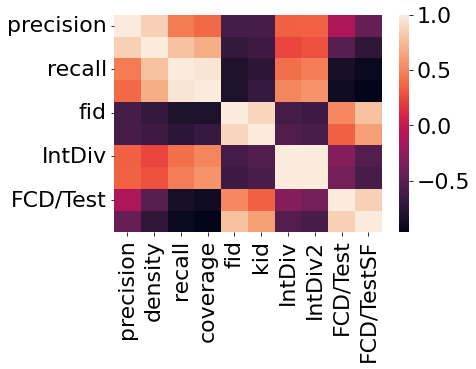

In [749]:
import seaborn as sns
prec=['precision','density','recall','coverage','fid', 'kid','IntDiv'  , 'IntDiv2', 'FCD/Test', 'FCD/TestSF']
dft4=df[prec].apply(pd.to_numeric)
sns.heatmap(dft4.corr());


In [746]:
dft4.corr()

,precision,density,recall,coverage,IntDiv,IntDiv2,FCD/Test,fid,kid,FCD/TestSF
precision,1.000000,0.856438,0.458333,0.379326,0.341858,0.348448,-0.128442,-0.603084,-0.600387,-0.450094
density,0.856438,1.000000,0.781641,0.691924,0.234527,0.277318,-0.514593,-0.695158,-0.659209,-0.718210
recall,0.458333,0.781641,1.000000,0.967711,0.401066,0.469123,-0.852400,-0.810825,-0.742154,-0.910692
coverage,0.379326,0.691924,0.967711,1.000000,0.500266,0.564599,-0.895086,-0.820688,-0.680013,-0.968225
IntDiv,0.341858,0.234527,0.401066,0.500266,1.000000,0.996532,-0.307069,-0.614023,-0.556738,-0.539658
IntDiv2,0.348448,0.277318,0.469123,0.564599,0.996532,1.000000,-0.380582,-0.649848,-0.586331,-0.595287
FCD/Test,-0.128442,-0.514593,-0.852400,-0.895086,-0.307069,-0.380582,1.000000,0.510417,0.341052,0.855863
fid,-0.603084,-0.695158,-0.810825,-0.820688,-0.614023,-0.649848,0.510417,1.000000,0.886049,0.782358
kid,-0.600387,-0.659209,-0.742154,-0.680013,-0.556738,-0.586331,0.341052,0.886049,1.000000,0.608194
FCD/TestSF,-0.450094,-0.718210,-0.910692,-0.968225,-0.539658,-0.595287,0.855863,0.782358,0.608194,1.000000


In [747]:
dft4

,precision,density,recall,coverage,IntDiv,IntDiv2,FCD/Test,fid,kid,FCD/TestSF
0,0.991752,1.176434,0.938751,0.979191,0.380060,0.347246,0.001361,1.373070,0.020276,52.961851
1,0.925714,0.858000,0.798592,0.698592,0.324409,0.301604,0.007139,20.814443,0.981051,53.114385
2,0.942276,0.968451,0.845262,0.867303,0.260563,0.244187,0.003498,7.121788,0.234487,53.006987
3,0.972235,1.027487,0.836454,0.868261,0.266357,0.249860,0.004013,6.600334,0.223925,53.021618
4,0.885175,0.882353,0.792605,0.800892,0.301872,0.284280,0.000242,10.220530,0.780235,53.068717
5,0.849791,0.759388,0.904082,0.828571,0.310689,0.292167,0.000509,63.188535,-14.156975,53.070129
6,0.864811,0.583221,0.221830,0.145662,0.185604,0.158864,0.108278,43.825225,1.608227,53.231053
7,0.979651,1.077907,0.404225,0.074648,0.035912,0.031312,0.073483,142.266087,15.899505,53.231091
8,0.940455,0.662864,0.025222,0.034538,0.368443,0.321648,0.095744,100.311976,10.664678,53.209922
9,0.919242,0.678773,0.211595,0.051658,0.326665,0.288718,0.094710,101.245949,13.099751,53.209416


valid                                   NaN
unique@1000                       -0.162040
unique@10000                       0.015950
FCD/Test                           0.035574
SNN/Test                           0.135580
Frag/Test                         -0.265291
FCD/TestSF                         0.152641
SNN/TestSF                        -0.232112
Frag/TestSF                             NaN
IntDiv                            -0.450207
IntDiv2                           -0.429222
Filters                            0.225059
logP                               0.502261
SA                                 0.014341
QED                                0.035597
weight                             0.335739
Novelty                                 NaN
AUC_ROC_based_metric_with_nspdk    1.000000
dtype: float64

In [299]:
pip install rich pyfiglet

     -------------------------------------- 238.7/238.7 kB 4.9 MB/s eta 0:00:00
     ------------------------------------- 865.8/865.8 kB 11.0 MB/s eta 0:00:00
     ---------------------------------------- 84.5/84.5 kB 4.6 MB/s eta 0:00:00
  Using cached Pygments-2.14.0-py3-none-any.whl (1.1 MB)
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.12.0
    Uninstalling Pygments-2.12.0:
      Successfully uninstalled Pygments-2.12.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbgrader 0.7.1 requires jupyter_client<8, but you have jupyter-client 8.1.0 which is incompatible.
nbgrader 0.7.1 requires traitlets<5.2.0, but you have traitlets 5.9.0 which is incompatible.


# New metric

New metric performace on:

C:\Users\cs843\AppData\Local\Temp\ipykernel_18120\3541619004.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2,0].set_yticklabels(['{}'.format(x/2) for x in ax[2,0].get_yticks().tolist()])


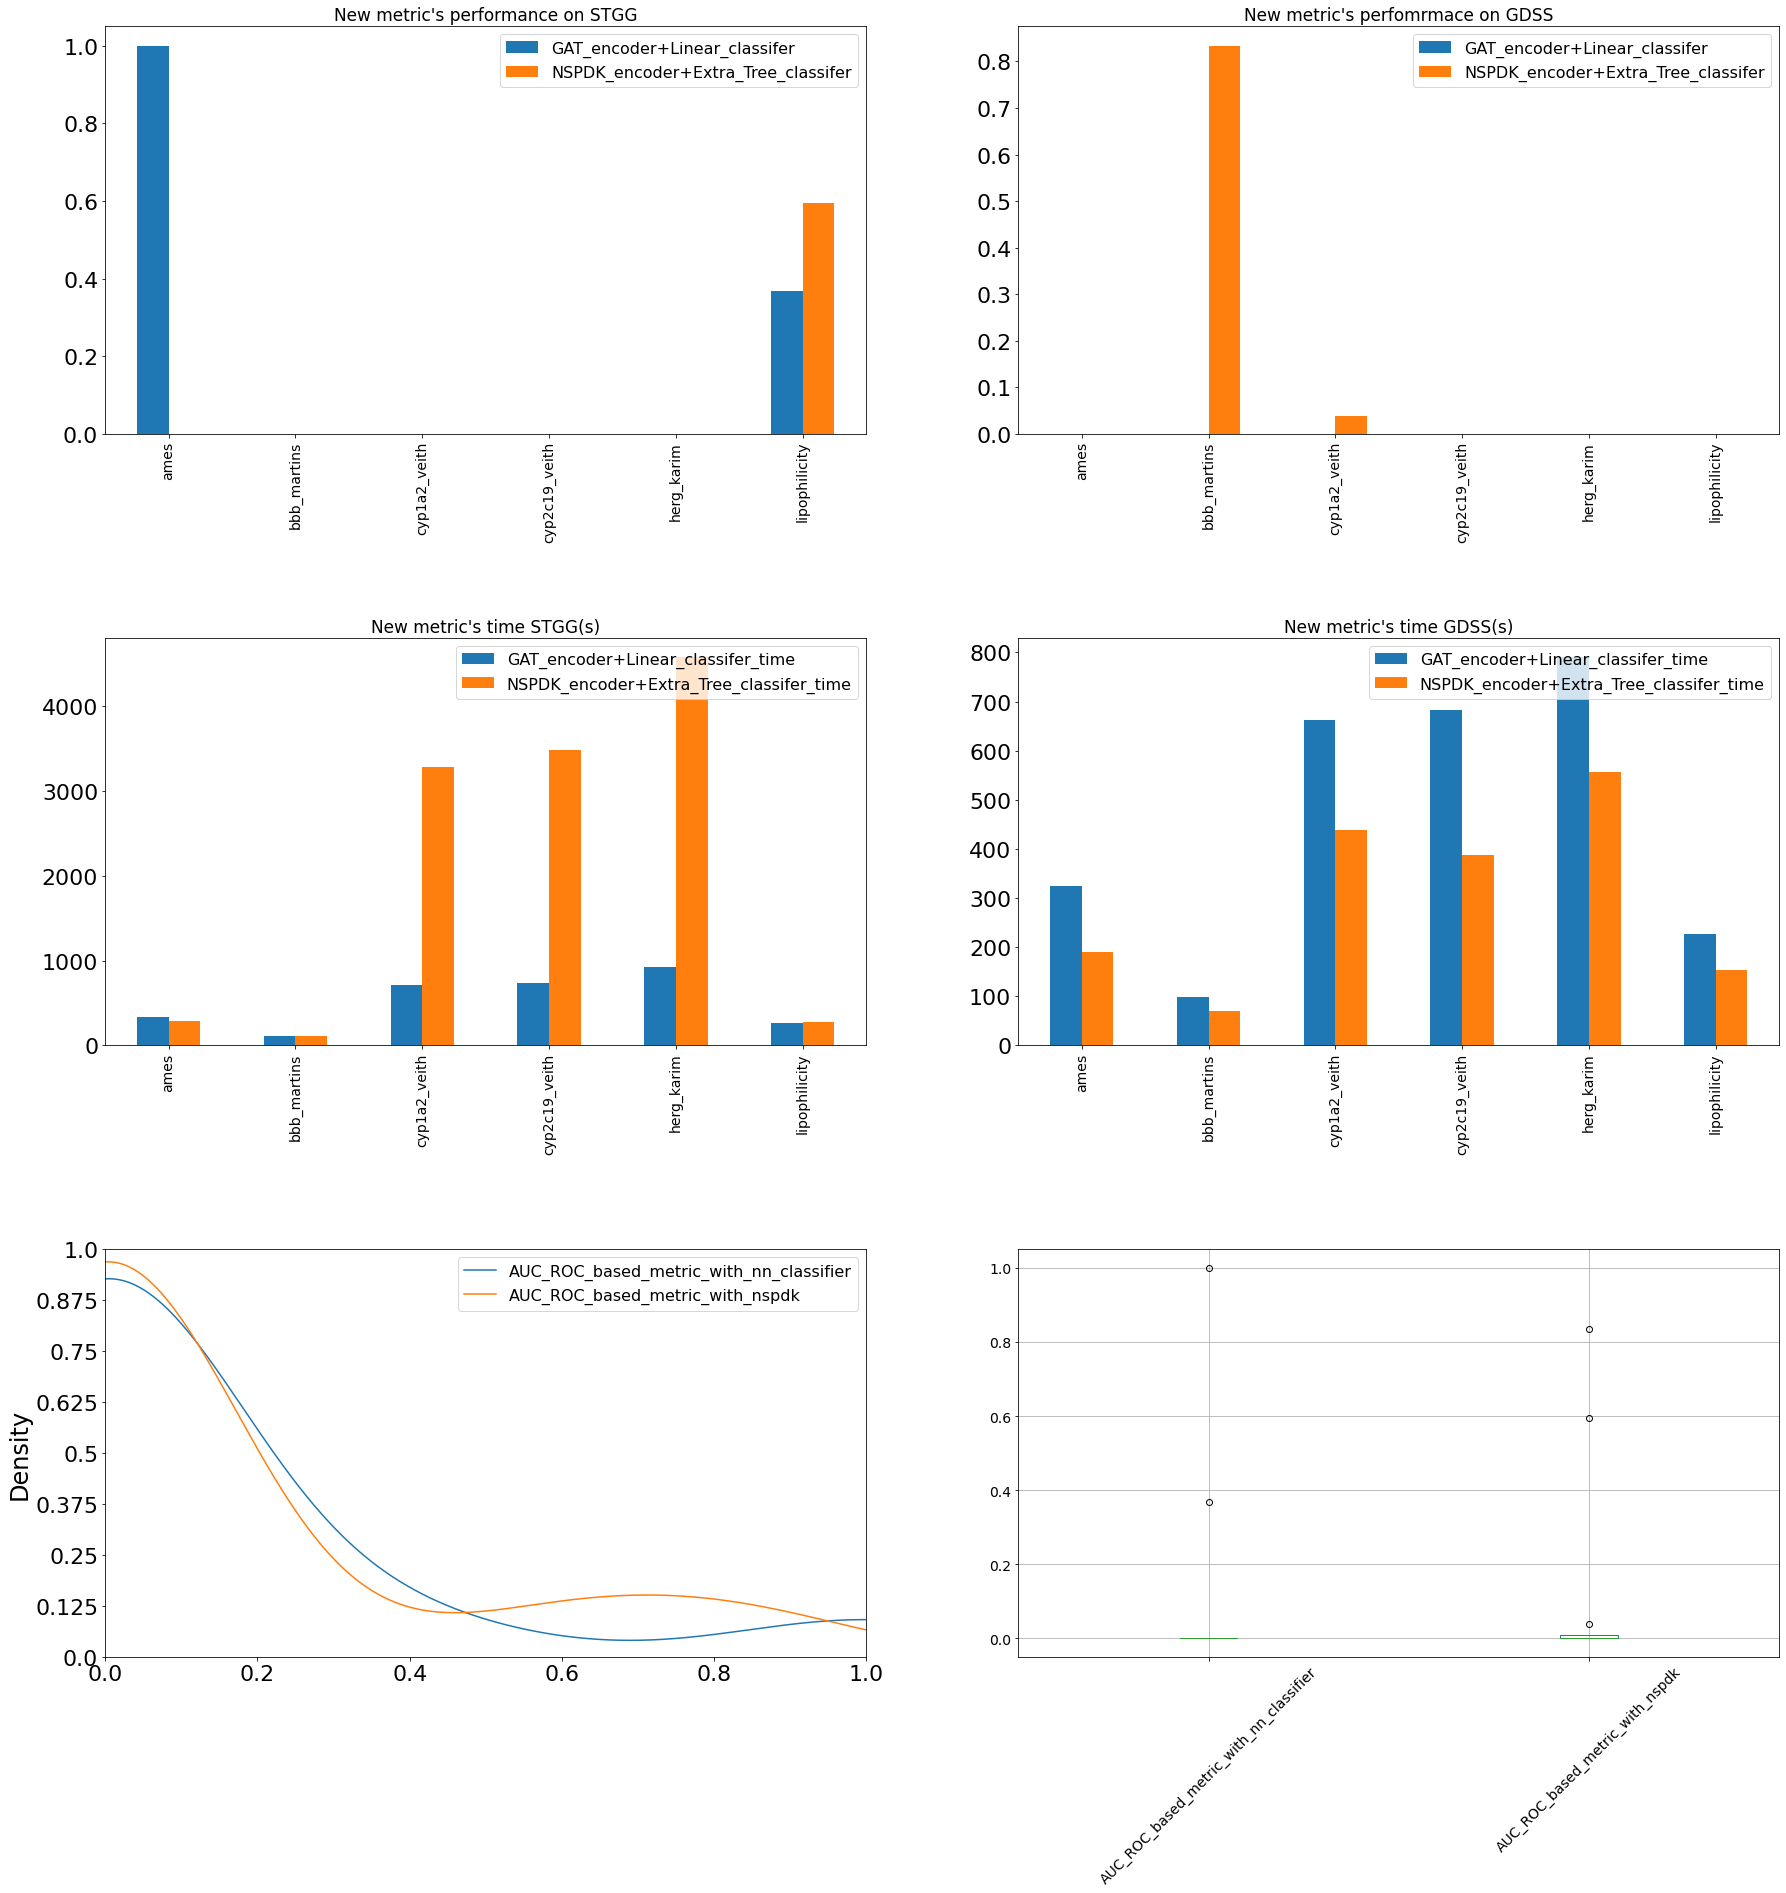

In [720]:
print('New metric performace on:')

mask_STGG= df[df[ 'generator_name']=='STGG'].set_index('dataset',drop=True)
mask_GDSS=df[df[ 'generator_name']=='GDSS'].set_index('dataset',drop=True)
x=df[['AUC_ROC_based_metric_with_nn_classifier','AUC_ROC_based_metric_with_nspdk']]
x1=df[['AUC_ROC_based_metric_with_nn_classifier_time','AUC_ROC_based_metric_with_nspdk_time']]
my_labels=['GAT_encoder+Linear_classifer' , 'NSPDK_encoder+Extra_Tree_classifer']
my_labels2=['GAT_encoder+Linear_classifer_time' , 'NSPDK_encoder+Extra_Tree_classifer_time']
df1=df[df[ 'generator_name']=='STGG'][['AUC_ROC_based_metric_with_nn_classifier','AUC_ROC_based_metric_with_nspdk']]
fig, ax = plt.subplots(3,2,figsize=(30, 30))

df1.plot(kind='bar', ax=ax[0,0])
ax[0,0].legend(fontsize=16, loc="upper right",labels=my_labels)
ax[0,0].set_title('New metric'"'s"' performance on STGG' ,fontsize=17)
ax[0,0].set_xticklabels(datasets,fontdict={'fontsize':14
                                           })


df2=df[df[ 'generator_name']=='GDSS'][['AUC_ROC_based_metric_with_nn_classifier','AUC_ROC_based_metric_with_nspdk']]
df2.plot(kind='bar',ax=ax[0,1])
ax[0,1].legend(fontsize=16, loc="upper right", labels=my_labels)
ax[0,1].set_title('New metric'"'s"' perfomrmace on GDSS',fontsize=17)
ax[0,1].set_xticklabels(datasets,fontdict={'fontsize':14})


df3=df[df[ 'generator_name']=='STGG'][['AUC_ROC_based_metric_with_nn_classifier_time','AUC_ROC_based_metric_with_nspdk_time']]

df3.plot(kind='bar', ax=ax[1,0])
ax[1,0].legend(fontsize=16, loc="upper right",labels=my_labels2)
ax[1,0].set_title('New metric'"'s"' time STGG(s)',fontsize=17)
ax[1,0].set_xticklabels(datasets,fontdict={'fontsize':14})

df4=df[df[ 'generator_name']=='GDSS'][['AUC_ROC_based_metric_with_nn_classifier_time','AUC_ROC_based_metric_with_nspdk_time']]
df4.plot(kind='bar',ax=ax[1,1])
ax[1,1].legend(fontsize=16, loc="upper right",labels=my_labels2)
ax[1,1].set_title('New metric'"'s"' time GDSS(s)',fontsize=17)
ax[1,1].set_xticklabels(datasets,fontdict={'fontsize':14})

#plt.tight_layout()


mask_STGG= df[df[ 'generator_name']=='STGG'].set_index('dataset',drop=True)
mask_GDSS=df[df[ 'generator_name']=='GDSS'].set_index('dataset',drop=True)
x=df[['AUC_ROC_based_metric_with_nn_classifier','AUC_ROC_based_metric_with_nspdk']]
#ax =x.plot.bar(x='dataset',y='AUC_ROC_based_metric_with_nn_classifier',rot=90, subplots=False,style='.-',fontsize=8)
#define number of rows and columns for subplots
#fig = plt.figure()
# Plotting

#',extent=[xmin, xmax, ymin, ymax]1)
x.plot(kind='kde',ax=ax[2,0])
ax[2,0].set_xlim(left=0, right=1)#',extent=[xmin, xmax, ymin, ymax]1)
ax[2,0].set_ylim(bottom=0, top=2)
ax[2,0].legend(fontsize=16, loc="upper right")
ax[2,0].set_yticklabels(['{}'.format(x/2) for x in ax[2,0].get_yticks().tolist()])


x.plot(kind='box',  vert=True, subplots=False, grid=True,rot=45,fontsize=14, ylabel='',ax=ax[2,1])
    #layout=(23, 2), sharey=False, legend=False,    
   # style=['r', 'r', 'r', 'g', 'g', 'g', 'b', 'b', 'b', 'r', 'r', 'r']
    #xticks=np.arange(0, len(df), 16))
#plt.tight_layout()
plt.subplots_adjust(hspace=0.5)


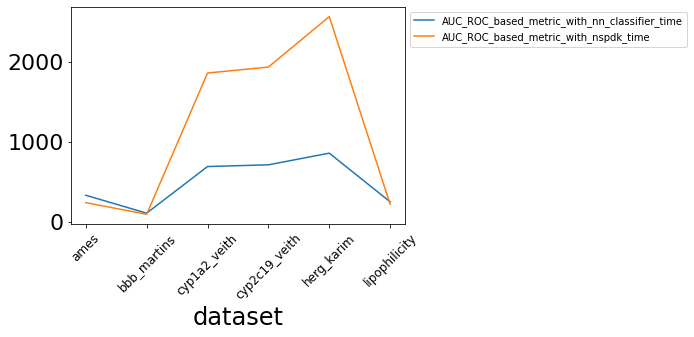

In [570]:
ax=df.groupby('dataset').mean()[['AUC_ROC_based_metric_with_nn_classifier_time','AUC_ROC_based_metric_with_nspdk_time']].plot(subplots=False,rot=90)
ax.set_xticks(x_sticks)
ax.set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')

In [349]:
mask_STGG[]

,generator_name,activations_time,fid,fid_time,kid,kid_time,precision,recall,f1_pr,precision_time,...,Filters,logP,SA,QED,weight,Novelty,AUC_ROC_based_metric_with_nspdk,AUC_ROC_based_metric_with_nspdk_time,AUC_ROC_based_metric_with_nn_classifier,AUC_ROC_based_metric_with_nn_classifier_time
dataset,,,,,,,,,,,,,,,,,,,,,
ames,STGG,0.697285,1.37307,0.701735,0.020276,0.746667,0.991752,0.938751,0.964534,1.226505,...,0.96033,0.182455,0.015304,0.003393,8.570959,1.0,0.0,283.389192,1.0,333.99452
bbb_martins,STGG,0.198101,20.814443,0.20378,0.981051,0.22387,0.925714,0.798592,0.857477,0.272538,...,0.982857,1.03086,0.030972,0.022741,46.691347,1.0,0.0,111.257165,0,110.898901
cyp1a2_veith,STGG,1.208452,7.121788,1.214427,0.234487,1.278845,0.942276,0.845262,0.891147,2.644842,...,0.986913,0.207638,0.009504,0.003978,12.691244,1.0,0.0,3284.773895,0.0,716.101946
cyp2c19_veith,STGG,1.920179,6.600334,1.928179,0.223925,2.050599,0.972235,0.836454,0.899258,3.4259,...,0.987969,0.208801,0.007883,0.013001,15.7898,1.0,0,3484.968972,0.0,739.405077
herg_karim,STGG,1.841321,10.22053,1.848253,0.780235,1.910412,0.885175,0.792605,0.836346,3.371871,...,0.98372,0.725923,0.026497,0.01233,25.829937,1.0,0.0,4579.832502,0.0,923.717069
lipophilicity_astrazeneca,STGG,0.422987,63.188535,0.426965,-14.156975,0.465437,0.849791,0.904082,0.876106,0.606047,...,0.991655,1.098614,0.029205,0.019139,36.523653,1.0,0.593858,278.95033,0.367695,267.490906


In [501]:
mask_GDSS=df[df[ 'generator_name']=='GDSS']
mask_GDSS.reset_index(drop=True)

,generator_name,activations_time,fid,fid_time,kid,kid_time,precision,recall,f1_pr,precision_time,...,logP,SA,QED,weight,Novelty,AUC_ROC_based_metric_with_nspdk,AUC_ROC_based_metric_with_nspdk_time,AUC_ROC_based_metric_with_nn_classifier,AUC_ROC_based_metric_with_nn_classifier_time,dataset
0,GDSS,4.199569,43.825225,4.221216,1.608227,11.563381,0.864811,0.22183,0.353103,4.742655,...,0.390547,0.096479,0.082687,120.227725,1.0,0.0,190.349896,0.0,324.822385,ames
1,GDSS,0.207756,142.266087,0.210669,15.899505,0.246352,0.979651,0.404225,0.572317,0.268709,...,4.999431,0.177467,0.078823,288.033731,1.0,0.833996,70.264571,0.0,98.975415,bbb_martins
2,GDSS,1.299549,100.311976,1.305879,10.664678,1.363241,0.940455,0.025222,0.049145,2.955743,...,1.207214,0.235725,0.0749,172.809781,1.0,0.038894,438.882517,0.0,662.693729,cyp1a2_veith
3,GDSS,1.309072,101.245949,1.315142,13.099751,1.369094,0.919242,0.211595,0.344019,2.855238,...,2.026072,0.15628,0.08582,139.732966,1.0,0.0,388.08042,0,682.230576,cyp2c19_veith
4,GDSS,1.401592,174.684136,1.407839,43.20504,1.462787,0.860391,0.028262,0.054745,2.66775,...,1.813551,0.285145,0.10931,163.961269,1.0,0.0,557.523423,0.0,790.258025,herg_karim
5,GDSS,0.45629,234.917399,0.460045,64.5617,0.49248,0.741497,0.005442,0.010825,0.689733,...,4.754169,0.31572,0.110376,290.030542,1.0,0.0,154.14642,0.0,226.283171,lipophilicity_astrazeneca


# Molecular metrics

17

Moelcular metrics

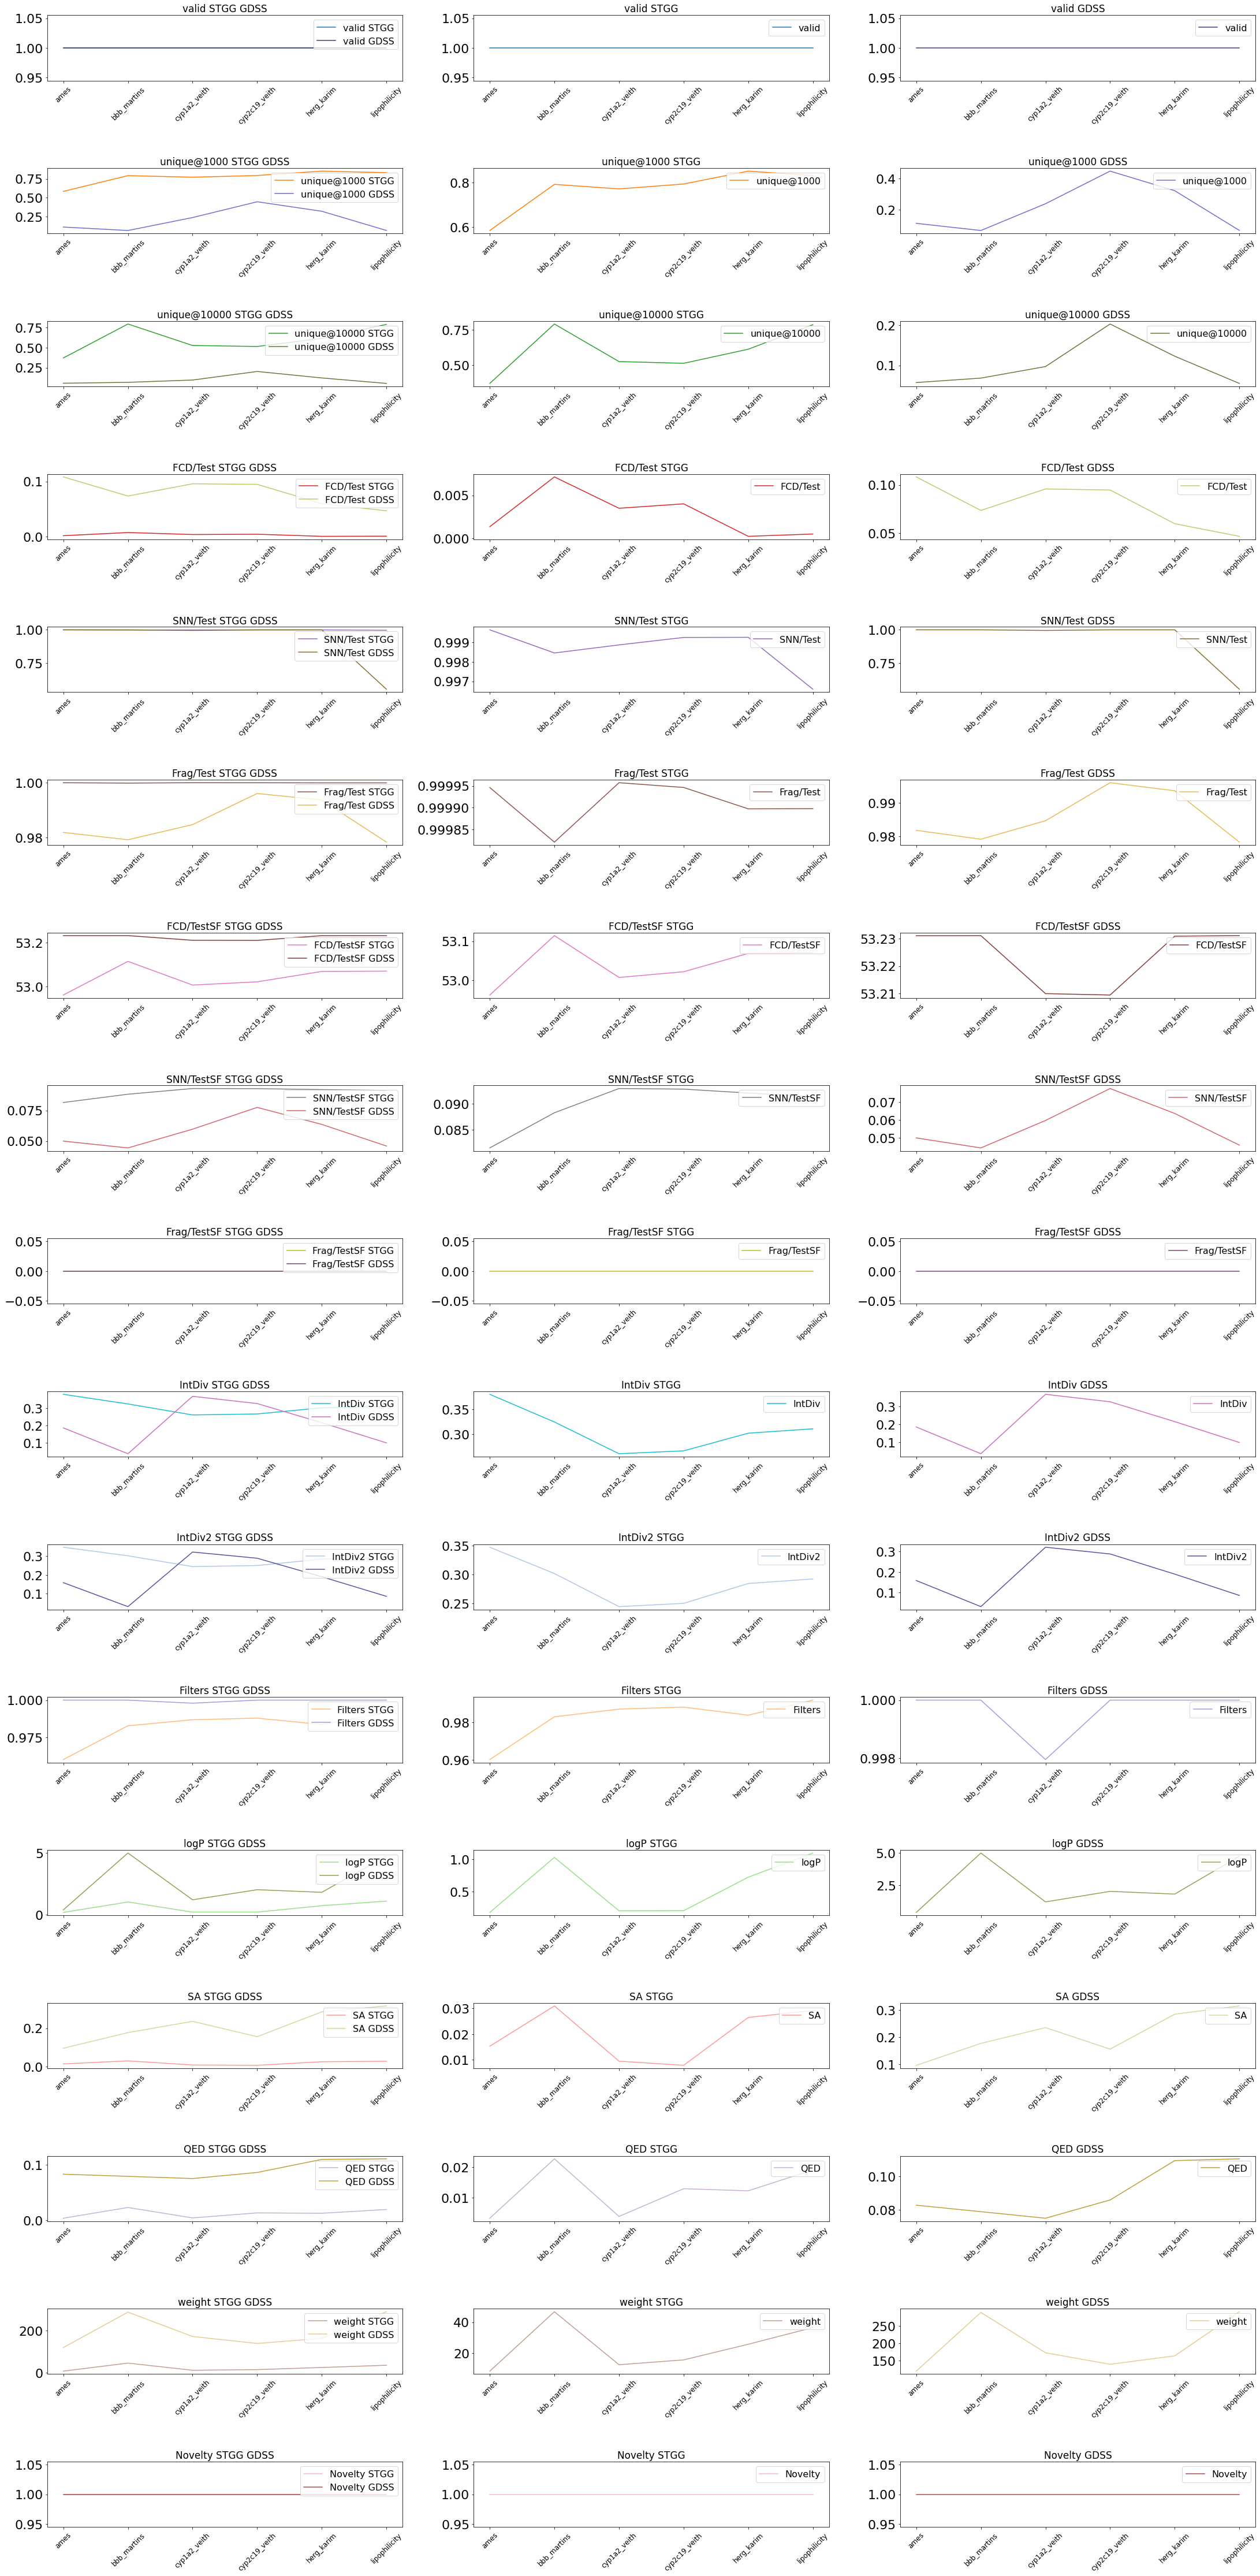

In [721]:
molecular_metrics=['valid', 'unique@1000', 'unique@10000', 'FCD/Test', 'SNN/Test' , 'Frag/Test', 'FCD/TestSF','SNN/TestSF',
 'Frag/TestSF', 'IntDiv', 'IntDiv2', 'Filters', 'logP', 'SA', 'QED', 'weight', 'Novelty']
print(len(molecular_metrics))
to_plot=molecular_metrics
cmapper = np.linspace(0, 1, len(to_plot))
cmapper = {key: cmapper[ix] for ix, key in enumerate(to_plot)}
cmap = plt.get_cmap('viridis')
def get_color(metric):
    return cmap(cmapper[metric])

cmapper_qualitative = {}
for c_ix, key in enumerate(to_plot):
    c_ix *= 2
    if c_ix >= 20:
        c_ix = (c_ix % 20) + 1
    cmapper_qualitative[key] = plt.cm.tab20(c_ix)

cmapper_qualitative2 = {}
for c_ix, key in enumerate(to_plot):
    c_ix *= 2
    if c_ix >= 20:
        c_ix = (c_ix % 20) + 1
    cmapper_qualitative2[key] = plt.cm.tab20b(c_ix)
                      
def get_color_qualitative(metric):
    return cmapper_qualitative[metric]

print('Moelcular metrics')
generators= ['STGG', 'GDSS']

mask_STGG= df[df[ 'generator_name']=='STGG']
mask_GDSS=df[df[ 'generator_name']=='GDSS']
datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity']

columns=3
rows=17
fig, ax = plt.subplots(rows,columns,figsize=(7.5, 80))
i=0
x_sticks=[0,1,2,3,4,5]

col=0
for r in range(0,rows):
    y=molecular_metrics[i] 
    mask_STGG[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r,col],c = get_color_qualitative(y), label=molecular_metrics[i]+' STGG')
    mask_GDSS.reset_index(drop=True)[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r,col],c = cmapper_qualitative2[y],label=molecular_metrics[i]+' GDSS')
    ax[r,col].legend(fontsize=16, loc="upper right")
    ax[r,col].set_title(y+' '+generators[0] +' '+ generators[1],fontsize=17)
    ax[r,col].set_xticks(x_sticks)
    ax[r,col].set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
    i+=1



plt.subplots_adjust(hspace=1.34,right=1.9)

i=0
col=1
for r in range(0,rows):
    y=molecular_metrics[i]
    mask_STGG[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r,col],c = get_color_qualitative(y))
    ax[r,col].legend(fontsize=16, loc="upper right")
    ax[r,col].set_title(y+' '+generators[0] ,fontsize=17)
    ax[r,col].set_xticks(x_sticks)
    ax[r,col].set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
    i+=1
  
plt.subplots_adjust(hspace=1.34,right=1.9)
i=0
col=2
for r in range(0,rows):
    y=molecular_metrics[i]
    mask_GDSS[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r,col],c = cmapper_qualitative2[y])
    ax[r,col].legend(fontsize=16, loc="upper right")
    ax[r,col].set_title(y+' '+generators[1] ,fontsize=17)
    ax[r,col].set_xticks([6,7,8,9,10,11])
    ax[r,col].set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
    i+=1

         
plt.subplots_adjust(hspace=1.34,right=4)

#plt.subplots_adjust(hspace=3)

In [461]:
mask_GDSS

,generator_name,activations_time,fid,fid_time,kid,kid_time,precision,recall,f1_pr,precision_time,...,logP,SA,QED,weight,Novelty,AUC_ROC_based_metric_with_nspdk,AUC_ROC_based_metric_with_nspdk_time,AUC_ROC_based_metric_with_nn_classifier,AUC_ROC_based_metric_with_nn_classifier_time,dataset
6,GDSS,4.199569,43.825225,4.221216,1.608227,11.563381,0.864811,0.22183,0.353103,4.742655,...,0.390547,0.096479,0.082687,120.227725,1.0,0.0,190.349896,0.0,324.822385,ames
7,GDSS,0.207756,142.266087,0.210669,15.899505,0.246352,0.979651,0.404225,0.572317,0.268709,...,4.999431,0.177467,0.078823,288.033731,1.0,0.833996,70.264571,0.0,98.975415,bbb_martins
8,GDSS,1.299549,100.311976,1.305879,10.664678,1.363241,0.940455,0.025222,0.049145,2.955743,...,1.207214,0.235725,0.0749,172.809781,1.0,0.038894,438.882517,0.0,662.693729,cyp1a2_veith
9,GDSS,1.309072,101.245949,1.315142,13.099751,1.369094,0.919242,0.211595,0.344019,2.855238,...,2.026072,0.15628,0.08582,139.732966,1.0,0.0,388.08042,0,682.230576,cyp2c19_veith
10,GDSS,1.401592,174.684136,1.407839,43.20504,1.462787,0.860391,0.028262,0.054745,2.66775,...,1.813551,0.285145,0.10931,163.961269,1.0,0.0,557.523423,0.0,790.258025,herg_karim
11,GDSS,0.45629,234.917399,0.460045,64.5617,0.49248,0.741497,0.005442,0.010825,0.689733,...,4.754169,0.31572,0.110376,290.030542,1.0,0.0,154.14642,0.0,226.283171,lipophilicity_astrazeneca


In [516]:
mask_STGG['precision']

0    0.991752
1    0.925714
2    0.942276
3    0.972235
4    0.885175
5    0.849791
Name: precision, dtype: object

# NN_based metrics

NN metrics

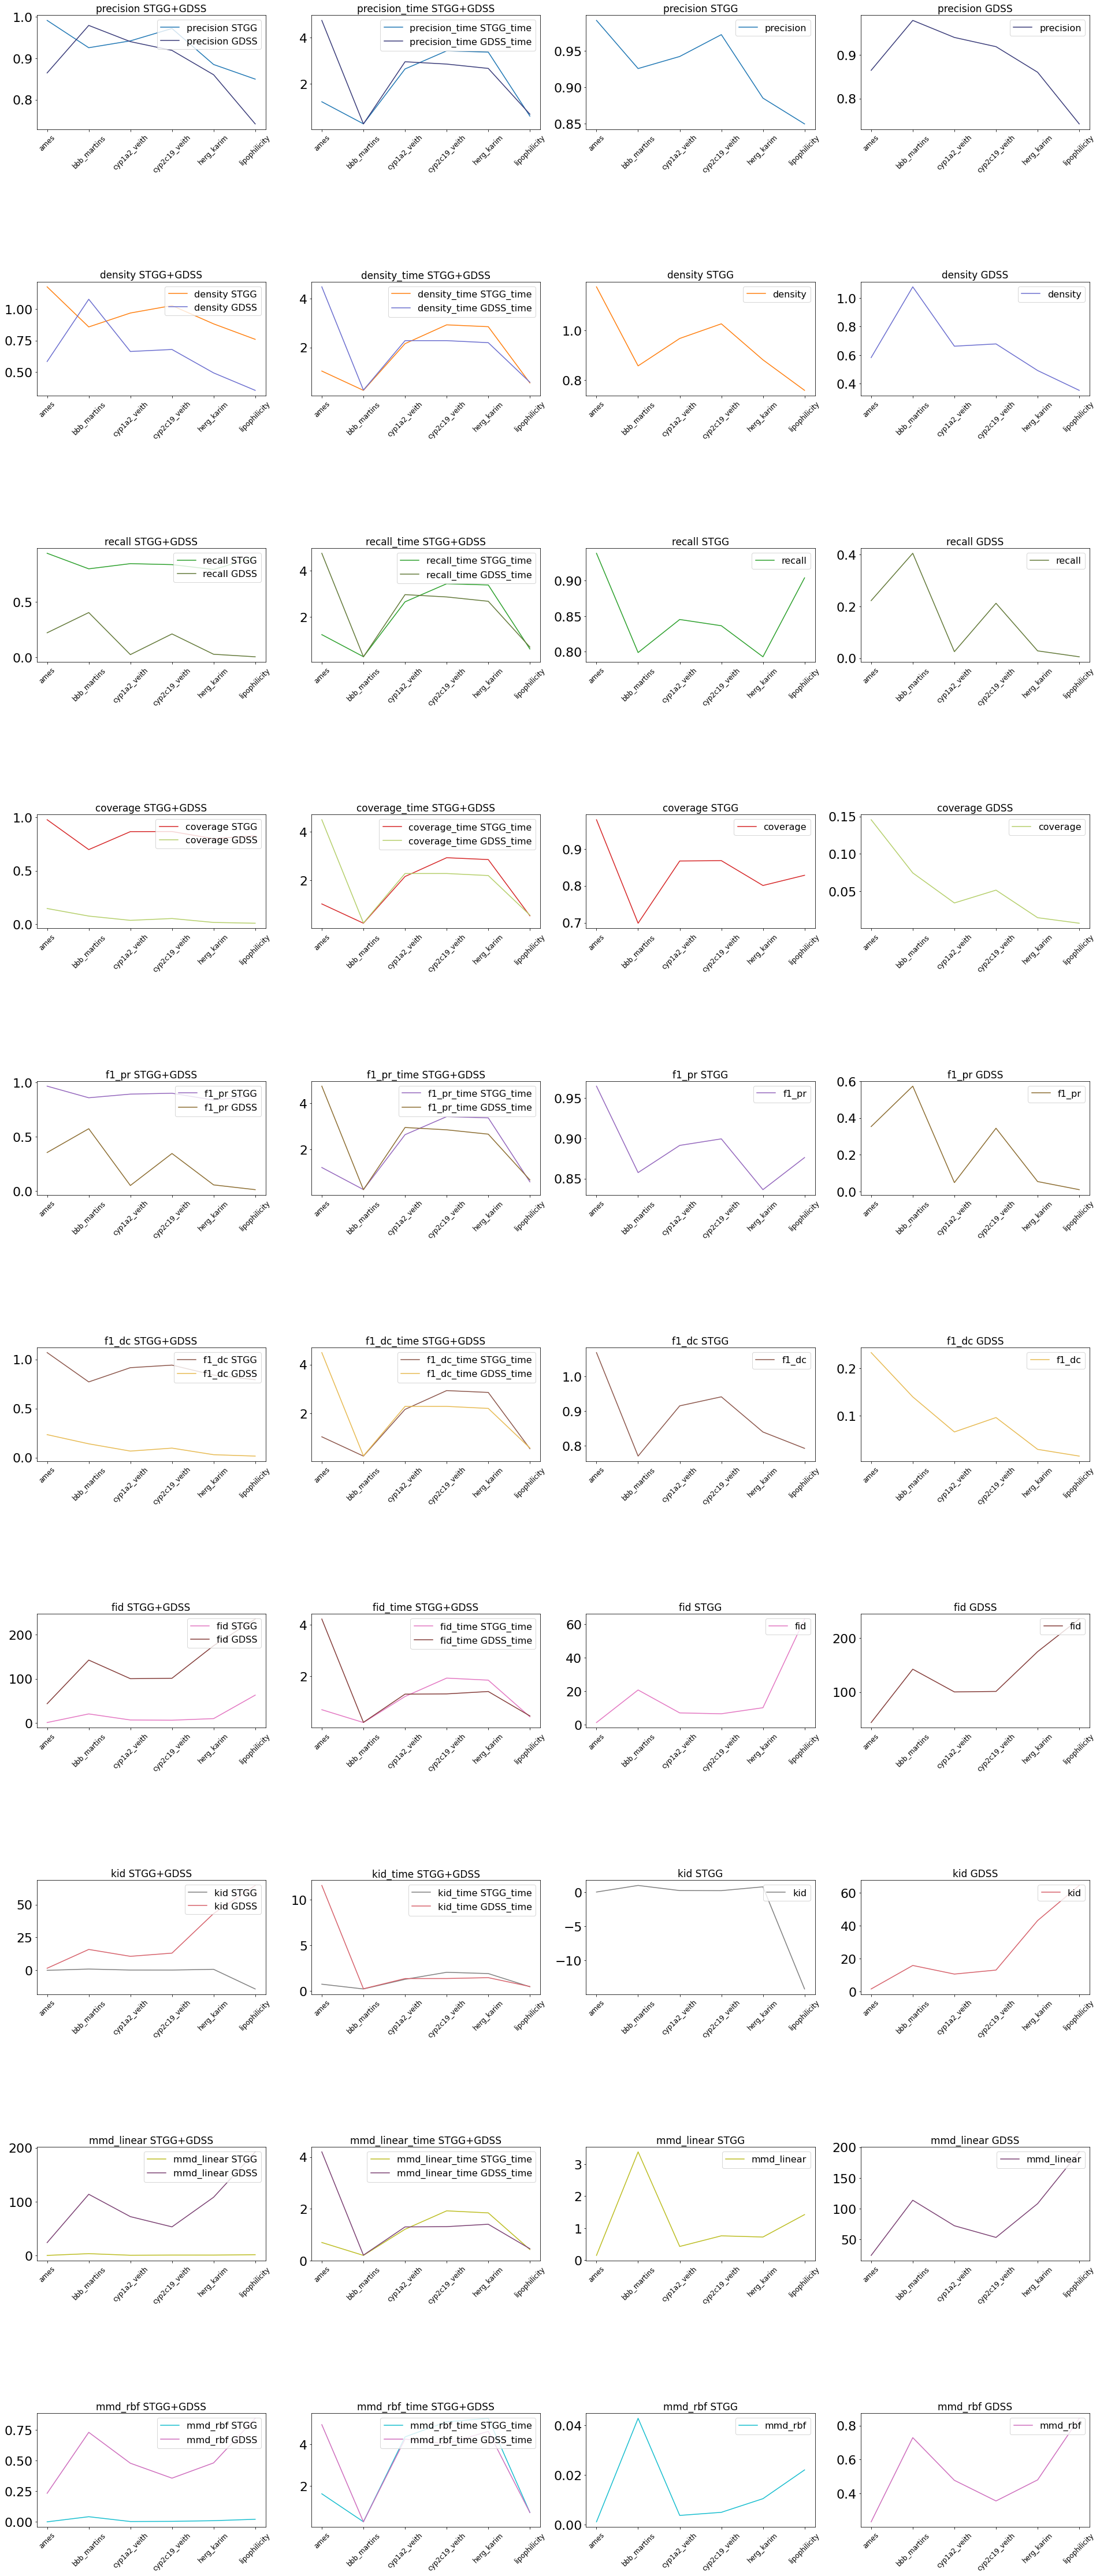

In [722]:
nn_metrics = [ 'precision', 'density', 'recall', 'coverage', 'f1_pr', 'f1_dc', 'fid', 'kid', 'mmd_linear',
               'mmd_rbf']
to_plot=nn_metrics
to_plot2=[i+'_time' for i  in nn_metrics ]

cmapper = np.linspace(0, 1, len(to_plot))
cmapper = {key: cmapper[ix] for ix, key in enumerate(to_plot)}
cmap = plt.get_cmap('viridis')

def get_color(metric):
    return cmap(cmapper[metric])

cmapper_qualitative = {}
for c_ix, key in enumerate(to_plot):
    c_ix *= 2
    if c_ix >= 20:
        c_ix = (c_ix % 20) + 1
    cmapper_qualitative[key] = plt.cm.tab20(c_ix)

cmapper_qualitative2 = {}
for c_ix, key in enumerate(to_plot):
    c_ix *= 2
    if c_ix >= 20:
        c_ix = (c_ix % 20) + 1
    cmapper_qualitative2[key] = plt.cm.tab20b(c_ix)
                      
def get_color_qualitative(metric):
    return cmapper_qualitative[metric]


cmapper_qualitative3 = {}
for c_ix, key in enumerate(to_plot2):
    c_ix *= 2
    if c_ix >= 20:
        c_ix = (c_ix % 20) + 1
    cmapper_qualitative3[key] = plt.cm.tab20(c_ix)

cmapper_qualitative4 = {}
for c_ix, key in enumerate(to_plot2):
    c_ix *= 2
    if c_ix >= 20:
        c_ix = (c_ix % 20) + 1
    cmapper_qualitative4[key] = plt.cm.tab20b(c_ix)
                      
def get_color_qualitative2(metric):
    return cmapper_qualitative3[metric]

print('NN metrics')
generators= ['STGG', 'GDSS']

mask_STGG= df[df[ 'generator_name']=='STGG']
mask_GDSS=df[df[ 'generator_name']=='GDSS'].reset_index(drop=True)
datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity']

columns=4
rows=10
fig, ax = plt.subplots(rows,columns,figsize=(7.5, 80))
i=0
x_sticks=[0,1,2,3,4,5]

col=0
for r in range(0,rows):
    y=nn_metrics[i] 
    mask_STGG[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r,col],c = get_color_qualitative(y), label=nn_metrics[i]+' STGG')
    mask_GDSS[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r,col],c = cmapper_qualitative2[y],label=nn_metrics[i]+' GDSS')
    ax[r,col].legend(fontsize=16, loc="upper right")
    ax[r,col].set_title(y+' '+generators[0] +'+'+ generators[1],fontsize=17)
    ax[r,col].set_xticks(x_sticks)
    ax[r,col].set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
    i+=1

plt.subplots_adjust(hspace=1.34,right=1.9)

i=0
col=1
for r in range(0,rows):
    y=to_plot2[i] 
    mask_STGG[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r,col],c = get_color_qualitative2(y), label=to_plot2[i]+' STGG_time')
    mask_GDSS[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r,col],c = cmapper_qualitative4[y],label=to_plot2[i]+' GDSS_time')
    ax[r,col].legend(fontsize=16, loc="upper right")
    ax[r,col].set_title(''+y+' '+generators[0] +'+'+ generators[1],fontsize=17)
    ax[r,col].set_xticks(x_sticks)
    ax[r,col].set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
    i+=1

plt.subplots_adjust(hspace=1.34,right=1.9)

i=0
col=2
for r in range(0,rows):
    y=nn_metrics[i]
    mask_STGG[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r,col],c = get_color_qualitative(y))
    ax[r,col].legend(fontsize=16, loc="upper right")
    ax[r,col].set_title(y+' '+generators[0] ,fontsize=17)
    ax[r,col].set_xticks(x_sticks)
    ax[r,col].set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
    i+=1
  
plt.subplots_adjust(hspace=1.34,right=1.9)
i=0
col=3
for r in range(0,rows):
    y=nn_metrics[i]
    mask_GDSS[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r,col],c = cmapper_qualitative2[y])
    ax[r,col].legend(fontsize=16, loc="upper right")
    ax[r,col].set_title(y+' '+generators[1] ,fontsize=17)
    ax[r,col].set_xticks(x_sticks)
    ax[r,col].set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
    i+=1

         
plt.subplots_adjust(hspace=1.34,right=3.5)

#plt.subplots_adjust(hspace=3)



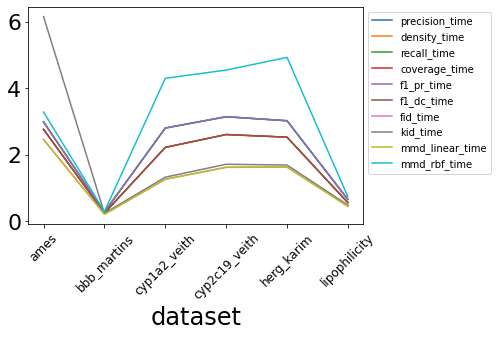

In [568]:
ax=df.groupby('dataset').mean()[to_plot2].plot(subplots=False,rot=90)
ax.set_xticks(x_sticks)
ax.set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')



In [792]:
    def score(r1,r2,r3,r4):
        #epsilon=1e-3
        r1=max(0.5, r1)
        r2=max(0.5, r2)
        r3=max(0.5, r3)
        r4=max(0.5, r4)
        if (r2-r1) <0:
            r2=r1
        else: 
            score1=min(1,(r4-0.5)/(r2-0.5))
            score2=min(1,(r3-0.5)/(r1-0.5))#min(1,1-max(0,r1-r3)/r1)
            #print(score1, score2)
            metric2=np.sqrt(score1*score2)
            metric=2*score1*score2/(score1+score2)
        return metric,metric2
   

In [794]:
 def score(r1,r2,r3,r4):
        r1=max(0.5, r1)
        r2=max(0.5, r2)
        r3=max(0.5, r3)
        r4=max(0.5, r4)
        if (r2-r1) <0:
            r2=r1
        else: 
            score1=min(1,(r4-0.5)/(r2-0.5))
            score2=min(1,(r3-0.5)/(r1-0.5))
            metric=2*score1*score2/(score1+score2)
        return metric

In [793]:
score(0.842753693	,0.848072671	,0.586177064	,0.857156589)


(0.40182273056254636, 0.5014236056886079)

In [762]:
x=1-(0.842753693 - 0.586177064)/ 0.842753693 #r1-r3/r1
x

0.6955496829843022

In [763]:
(0.857156589 -0.842753693)/ (0.848072671-0.842753693 )

2.7078314668720607

In [772]:
r1=0.842753693
r2=0.848072671
r3=0.586177064
r4=0.857156589

In [777]:
min(1,r4/r2)

1

In [778]:
min(1,r1/r3)

1

# Structural metrics



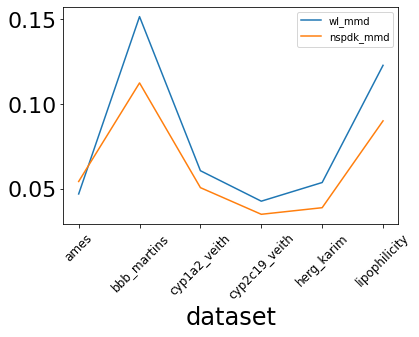

In [573]:
structural_metrics=['wl_mmd','nspdk_mmd']
ax=df.groupby('dataset').mean()[structural_metrics].plot(subplots=False,rot=90)
ax.set_xticks(x_sticks)
ax.set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')

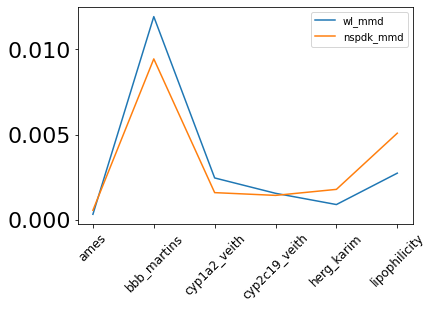

In [576]:
structural_metrics=['wl_mmd','nspdk_mmd']
ax=mask_STGG[structural_metrics].plot(subplots=False,rot=90)
ax.set_xticks(x_sticks)
ax.set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')

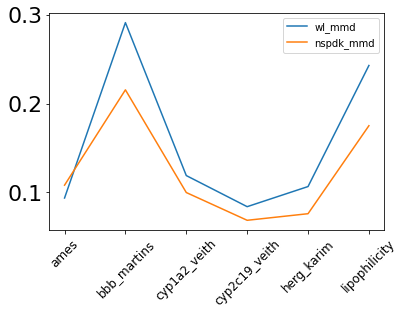

In [586]:
structural_metrics=['wl_mmd','nspdk_mmd']
ax=mask_GDSS[structural_metrics].plot(subplots=False,rot=90)
ax.set_xticks(x_sticks)
ax.set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')

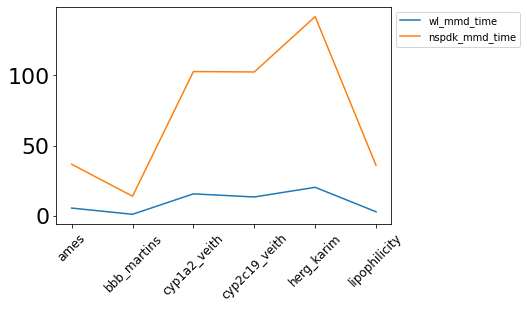

In [587]:
structural_metrics=['wl_mmd_time','nspdk_mmd_time']
ax=df.groupby('dataset').mean()[structural_metrics].plot(subplots=False,rot=90)
ax.set_xticks(x_sticks)
ax.set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')

In [19]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import os


generators=['STGG','GDSS']
datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
nn_metrics = [ 'precision', 'density', 'recall', 'coverage', 'f1_pr', 'f1_dc', 'fid', 'kid', 'mmd_linear',
               'mmd_rbf']
structural_metrics = ['wl_mmd', 'nspdk_mmd']#'clustering_mmd', 'degree_mmd',orbits_mmd

dont_plot = ['wl_mmd']
to_plot = [metric for metric in nn_metrics + structural_metrics if metric not in dont_plot]
print(to_plot)

molecular_metrics=['valid', 'unique@1000', 'unique@10000', 'FCD/Test', 'SNN/Test' , 'Frag/Test', 'FCD/TestSF','SNN/TestSF',
 'Frag/TestSF', 'IntDiv', 'IntDiv2', 'Filters', 'logP', 'SA', 'QED', 'weight', 'Novelty']

new_metrics=['AUC_ROC_based_metric_with_nspdk','AUC_ROC_based_metric_with_nn_classifier']

all_metrics = list(set(nn_metrics + structural_metrics + molecular_metrics + new_metrics ))
metrics_types=['nn_metrics','structural_metrics','molecular_metrics','new_metrics']

cmapper = np.linspace(0, 1, len(to_plot))
cmapper = {key: cmapper[ix] for ix, key in enumerate(to_plot)}
cmap = plt.get_cmap('viridis')
def get_color(metric):
    return cmap(cmapper[metric])

cmapper_qualitative = {}
for c_ix, key in enumerate(to_plot):
    c_ix *= 2
    if c_ix >= 20:
        c_ix = (c_ix % 20) + 1
    cmapper_qualitative[key] = plt.cm.tab20(c_ix)
                      
def get_color_qualitative(metric):
    return cmapper_qualitative[metric]


def should_plot(metric):
    return metric not in dont_plot

def get_label(metric):
    metric_to_label = {'mmd_linear': 'MMD Linear',
                       'mmd_rbf': 'MMD RBF',
                       'fid': 'FD',
                       'kid': 'KD',
                        'nspdk_mmd': 'NSPDK MMD',
                       'degree_mmd': 'Degree MMD',
                       'clustering_mmd': 'Clustering MMD',
                       'wl_mmd': 'WL MMD',
                       'orbits_mmd': 'Orbits MMD',
                       'f1_pr': 'F1 PR',
                       'f1_dc': 'F1 DC',
                       'AUC_ROC_based_metric_with_nspdk': 'New metric NSPDK',
                       'AUC_ROC_based_metric_with_nn_classifier': 'New metric NN',}
#                        
    
    if metric in metric_to_label:
        return metric_to_label[metric]
    elif '_' not in metric: # PRDC
        return metric.title()
    elif 'mmd' not in metric: # F1 scores
        return ' '.join(metric.split('_')).upper()

plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=24) # 26     # fontsize of the axes title
plt.rc('axes', labelsize=24)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=22)    # fontsize of the tick labels
plt.rc('ytick', labelsize=22)    # fontsize of the tick labels
plt.rc('legend', fontsize=24)    # legend fontsize
plt.rc('figure', titlesize=12)  # fontsize of the figure title\

['precision', 'density', 'recall', 'coverage', 'f1_pr', 'f1_dc', 'fid', 'kid', 'mmd_linear', 'mmd_rbf', 'clustering_mmd', 'degree_mmd', 'orbits_mmd', 'nspdk_mmd']


In [39]:
ames_filter=df.loc[df['dataset']=='ames' ]
bbb_martins_filter=df.loc[df['dataset']=='bbb_martins' ]
cyp1a2_veith_filter=df.loc[df['dataset']=='cyp1a2_veith' ]
cyp2c19_veith_filter=df.loc[df['dataset']=='cyp2c19_veith' ]
herg_karim_filter=df.loc[df['dataset']=='herg_karim' ]
lipophilicity_astrazeneca_filter=df.loc[df['dataset']=='lipophilicity_astrazeneca' ]


# Print results per datasets


In [69]:
experiments =generators
metrics_to_avoid = ['fid', 'kid', 'mmd_linear']



In [86]:
metrics = ['nn_metrics']
results = {key: [] for key in metrics}

#differences based on metrics types per dataset
datasets=['bbb_martins']
for i in datasets:
     for ix, row in df.iterrows():
         """
         if row['dataset']==i:
            metric = row['metric']
         """
         metric=row[eval(f'{metrics[0]}')].values
         #print(metric)
         results[metrics[0]].append(metric)
results

{'nn_metrics': [array([1.0, 1.2053639846743296, 1.0, 1.0, 1.00001, 1.0931303090896223,
         3.3299173196610354e-08, -0.27056575, 0.0, 0], dtype=object),
  array([1.0, 1.2053639846743296, 1.0, 1.0, 1.00001, 1.0931303090896223,
         3.3299173196610354e-08, -0.27056575, 0.0, 0], dtype=object),
  array([1.0, 1.2053639846743296, 1.0, 1.0, 1.00001, 1.0931303090896223,
         3.3299173196610354e-08, -0.27056575, 0.0, 0], dtype=object),
  array([1.0, 1.2053639846743296, 1.0, 1.0, 1.00001, 1.0931303090896223,
         3.3299173196610354e-08, -0.27056575, 0.0, 0], dtype=object),
  array([1.0, 1.2053639846743296, 1.0, 1.0, 1.00001, 1.0931303090896223,
         3.3299173196610354e-08, -0.27056575, 0.0, 0], dtype=object),
  array([1.0, 1.2053639846743296, 1.0, 1.0, 1.00001, 1.0931303090896223,
         3.3299173196610354e-08, -0.27056575, 0.0, 0], dtype=object),
  array([1.0, 1.2053639846743296, 1.0, 1.0, 1.00001, 1.0931303090896223,
         3.3299173196610354e-08, -0.27056575, 0.0, 0], 

In [ ]:
#differences based on metrics types per generators 

In [ ]:
#New metric response  for each generator 

{'nn_metrics': array([[1.0, 1.2053639846743296, 1.0, 1.0, 1.00001, 1.0931303090896223,
        3.3299173196610354e-08, -0.27056575, 0.0, 0],
       [1.0, 1.2053639846743296, 1.0, 1.0, 1.00001, 1.0931303090896223,
        3.3299173196610354e-08, -0.27056575, 0.0, 0],
       [1.0, 1.2053639846743296, 1.0, 1.0, 1.00001, 1.0931303090896223,
        3.3299173196610354e-08, -0.27056575, 0.0, 0],
       [1.0, 1.2053639846743296, 1.0, 1.0, 1.00001, 1.0931303090896223,
        3.3299173196610354e-08, -0.27056575, 0.0, 0],
       [1.0, 1.2053639846743296, 1.0, 1.0, 1.00001, 1.0931303090896223,
        3.3299173196610354e-08, -0.27056575, 0.0, 0],
       [1.0, 1.2053639846743296, 1.0, 1.0, 1.00001, 1.0931303090896223,
        3.3299173196610354e-08, -0.27056575, 0.0, 0],
       [1.0, 1.2053639846743296, 1.0, 1.0, 1.00001, 1.0931303090896223,
        3.3299173196610354e-08, -0.27056575, 0.0, 0],
       [1.0, 1.2053639846743296, 1.0, 1.0, 1.00001, 1.0931303090896223,
        3.3299173196610354e-08,

TypeError: 'AxesSubplot' object is not subscriptable

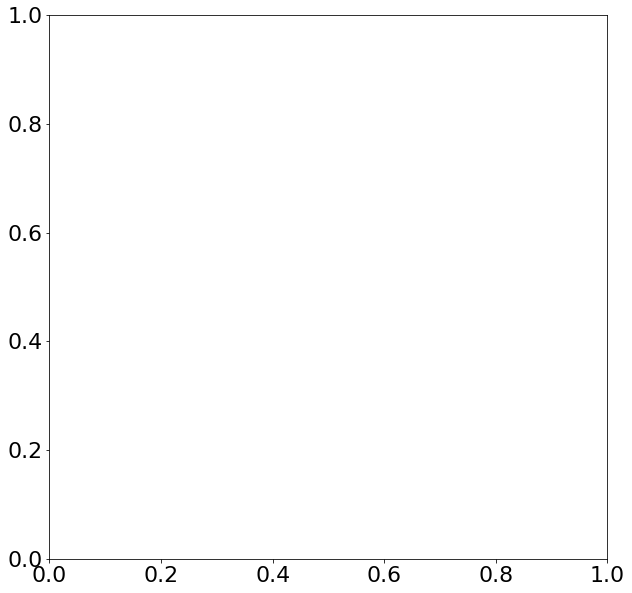

In [98]:
linestyles = {'mmd_rbf': {'linestyle': '-', 'marker': 'X'},
              'f1_pr': {'linestyle': '-', 'marker': 'o'},
              'f1_dc': {'linestyle': '-', 'marker': 'v'},
              'coverage': {'linestyle': '-.', 'marker': 'X'},
              'recall': {'linestyle': '-.', 'marker': 'o'},
              'density': {'linestyle': ':', 'marker': 'X'},
              'precision': {'linestyle': ':', 'marker': 'o'},
              'orbits_mmd': {'linestyle': '--', 'marker': 'X'},
              'clustering_mmd': {'linestyle': '--', 'marker': 'o'},
              'degree_mmd': {'linestyle': '--', 'marker': 'v'},
              'nspdk_mmd': {'linestyle': '--', 'marker': '^'},
              'wl_mmd': {'linestyle': '--', 'marker': '^'}}
fig, axes = plt.subplots(1, 1, figsize=(10, 10))

for key, result in results.items():
    if key in metrics_to_avoid:
        continue
    results[key] = np.concatenate([res.reshape(1, -1) for res in result], axis=0)
print(results) 
x_axis = np.arange(0, 1, 0.01)
mean = np.mean(results[key], axis=0)
print(mean)
#std = np.std(results[key], axis=0)
try:
    kwargs = linestyles['nn_metrics']
except:
    print(key, 'not in ls')

axes[0].plot(x_axis, mean, color=get_color_qualitative(key), label=get_label(key), markevery=5, **kwargs) #markersize=8, lw=3, **kwargs)
#         if key in mmd_metrics:
#             axs.fill_between(x_axis, mean + std, mean - std, color=get_color_qualitative(key), alpha=0.3)


In [ ]:
linestyles = {'mmd_rbf': {'linestyle': '-', 'marker': 'X'},
              'f1_pr': {'linestyle': '-', 'marker': 'o'},
              'f1_dc': {'linestyle': '-', 'marker': 'v'},
              'coverage': {'linestyle': '-.', 'marker': 'X'},
              'recall': {'linestyle': '-.', 'marker': 'o'},
              'density': {'linestyle': ':', 'marker': 'X'},
              'precision': {'linestyle': ':', 'marker': 'o'},
              'orbits_mmd': {'linestyle': '--', 'marker': 'X'},
              'clustering_mmd': {'linestyle': '--', 'marker': 'o'},
              'degree_mmd': {'linestyle': '--', 'marker': 'v'},
              'nspdk_mmd': {'linestyle': '--', 'marker': '^'},
              'wl_mmd': {'linestyle': '--', 'marker': '^'},
#               'mmd_rbf_quadratic_single': {'linestyle': '-', 'marker': '>'}
             }
plt.rc('legend', fontsize=16)    # legend fontsize

def plot_line_plot(df, axs, exps, datasets, metrics=to_plot, title=None):
# for exp in experiments:
#     if type (exps) == list:
    
#     else:

    results = {key: [] for key in exps}

#     fig, axs = plt.subplots(figsize=(12.5, 10)) # To plot just comp-eff quantity
    for exp in exps:
       for i in datasets:
       #differences based on metrics types per dataset
          for ix, row in df.iterrows():
             if row['dataset']==i:
                 metric=row[eval(f'{exp}')].values
                 results[exp].append(metric)
             
            
    for key, result in results.items():
        if key in metrics_to_avoid:
            continue
        results[key] = np.concatenate([res.reshape(1, -1) for res in result], axis=0)

        x_axis = np.arange(0, 1, 0.01)
        mean = np.mean(results[key], axis=0)
        std = np.std(results[key], axis=0)
        try:
            kwargs = linestyles[key]
        except:
            print(key, 'not in ls')
            continue
        axs.plot(x_axis, mean, color=get_color_qualitative(key), label=get_label(key), markevery=5, **kwargs) #markersize=8, lw=3, **kwargs)
#         if key in mmd_metrics:
#             axs.fill_between(x_axis, mean + std, mean - std, color=get_color_qualitative(key), alpha=0.3)
        axs.set_ylabel(r'$\hat \rho(\mathbb{S}_g, \mathbb{S}_r)$')
        axs.set_xlabel(r'Degree of perturbation')
#         axs.set_xlabel(r'Ratio ($t$)')
#         if title is None:
#             axs.set_title(get_experiment_title(exps[0]))
#         else:
#             axs.set_title(title)
        axs.set_ylim(-0.01, 1.1)

#     leg = axs.legend(loc='lower right', ncol=3)
    
#     for text in leg.get_texts():
#         metric = text.get_text()
#         if 'MMD' in metric and 'RBF' not in metric:
#             color = 'b'
#         else:
#             color = 'r'
#         plt.setp(text, color=color)

    # Get the bounding box of the original legend
#     bb = leg.get_bbox_to_anchor().inverse_transformed(axs.transAxes)

#     # Change to location of the legend. 
#     # xOffset = 0.2 # Play with this to tweak position of legend
#     yOffset = 0.6 # Play with this to tweak position of legend
#     bb.y0 -= yOffset
#     bb.y1 -= yOffset
#     xOffset = -0
#     bb.x0 -= xOffset
#     bb.x1 -= xOffset
#     leg.set_bbox_to_anchor(bb, transform = axs.transAxes)
    
#     fig.savefig(exp + '.jpg', bbox_inches='tight')


In [ ]:
to_plot='nspdk_mmd'
fig, axes = plt.subplots(1, 3, figsize=(27, 5))
experiments= [ 'nn_metrics']
for exp in experiments:
    plot_line_plot(df,axes[0], exp, datasets, metrics=[metric for metric in nn_metrics if metric in to_plot], title='NN metrics')
    plot_line_plot(df,axes[1], exp, datasets, metrics=[metric for metric in structural_metrics if metric in to_plot], title='Structural metrics')
    plot_line_plot(df, axes[2], exp, datasets, metrics=molecular_metrics, title='Molecular  metrics')
    h1, l1 = axes[1].get_legend_handles_labels()
    h2, l2 = axes[2].get_legend_handles_labels()
    axes[1].set_ylabel('')
    axes[1].set_yticklabels([])
    axes[2].set_ylabel('')
    axes[2].set_yticklabels([])
    axes[0].set_title('NN metrics')
    axes[1].set_title('Structural metrics')
    axes[2].set_title('Molecular  metrics')
    leg = fig.legend(h1+h2, l1+l2, loc='lower center', ncol=6)
    #     # Get the bounding box of the original legend
    
    bb = leg.get_bbox_to_anchor().inverse_transformed(axes[0].transAxes)

    # Change to location of the legend. 
    # xOffset = 0.2 # Play with this to tweak position of legend
    yOffset = 0.3 # Play with this to tweak position of legend
    bb.y0 -= yOffset
    bb.y1 -= yOffset
    xOffset = 0
    bb.x0 -= xOffset
    bb.x1 -= xOffset
    leg.set_bbox_to_anchor(bb, transform = axes[0].transAxes)
    plt.show()
    
#     fig.savefig(f'paper/paper-figures2/{exp}/line_plot.jpg', bbox_inches='tight')
    fig.savefig(f'paper/paper-figures2/{exp}/line_plot.pdf', bbox_inches='tight')
#     

In [ ]:
for exp in generators:
    print(exp)
    fig, axes = plt.subplots(1, 3, figsize=(27, 5))
    plot_line_plot(axes[0], [exp], datasets, metrics=[metric for metric in gin_metrics if metric in to_plot], title='Random weights')
    plot_line_plot(axes[1], [exp], datasets, pretrained=True, init='default', metrics=[metric for metric in gin_metrics if metric in to_plot], title='Pretrained weights')
    plot_line_plot(axes[2], [exp], datasets, metrics=mmd_metrics, title='Baseline metrics')
    h1, l1 = axes[1].get_legend_handles_labels()
    h2, l2 = axes[2].get_legend_handles_labels()
    axes[1].set_ylabel('')
    axes[1].set_yticklabels([])
    axes[2].set_ylabel('')
    axes[2].set_yticklabels([])
    axes[0].set_title('Random weights')
    axes[1].set_title('Pretrained weights')
    axes[2].set_title('Baseline (GNN-agnostic) metrics')
    leg = fig.legend(h1+h2, l1+l2, loc='lower center', ncol=6)
    #     # Get the bounding box of the original legend
    
    bb = leg.get_bbox_to_anchor().inverse_transformed(axes[0].transAxes)

    # Change to location of the legend. 
    # xOffset = 0.2 # Play with this to tweak position of legend
    yOffset = 0.3 # Play with this to tweak position of legend
    bb.y0 -= yOffset
    bb.y1 -= yOffset
    xOffset = 0
    bb.x0 -= xOffset
    bb.x1 -= xOffset
    leg.set_bbox_to_anchor(bb, transform = axes[0].transAxes)
    plt.show()
    
#     fig.savefig(f'paper/paper-figures2/{exp}/line_plot.jpg', bbox_inches='tight')
    fig.savefig(f'paper/paper-figures2/{exp}/line_plot.pdf', bbox_inches='tight')
#     break